# **scScope**
implementation pipeline of scScope model from scdeep package

The pipline consists of the foloowing :
* Loading the data and building a AnnData from the counts data nad metadata
* Preprocessing(quality filtering) and training the scScope model
* Comapring the quality of data before and after the application of model
* Down stream Analysis - PCA, UMAP, Clustering analysis
* Additional visualizations





In [2]:
!pip install scdeep

In [3]:
!pip install -q scanpy
!pip install -q phenograph

     |████████████████████████████████| 7.2MB 68.4MB/s 
     |████████████████████████████████| 122kB 57.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
     |████████████████████████████████| 2.4MB 4.9MB/s 
     |████████████████████████████████| 3.2MB 12.9MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import scdeep 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
count_dataframe = pd.read_csv('brain_counts.csv', 
                              index_col=0)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,0610011L14Rik,0610012G03Rik,0610012H03Rik,0610030E20Rik,0610031J06Rik,0610031O16Rik,0610037L13Rik,0610037P05Rik,0610038B21Rik,0610038L08Rik,0610039K10Rik,0610040B10Rik,0610040F04Rik,0610040J01Rik,0610043K17Rik,0910001L09Rik,100043387,1100001G20Rik,1110001A16Rik,1110001J03Rik,1110002B05Rik,1110002L01Rik,...,Zranb3,Zrsr1,Zrsr2,Zscan10,Zscan12,Zscan18,Zscan2,Zscan20,Zscan21,Zscan22,Zscan29,Zscan4a,Zscan4b,Zscan4c,Zscan4d,Zscan4e,Zscan4f,Zscan5b,Zswim1,Zswim2,Zswim3,Zswim4,Zswim5,Zswim6,Zswim7,Zufsp,Zw10,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,0,0,8,0,0,66,140,218,0,110,0,0,155,0,0,37,0,0,0,0,0,0,0,0,0,0,0,30,107,0,...,0,0,0,0,35,0,0,0,0,9,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,722,0,0,0,0,0,0,0,0,0,0,128,1,0,0,0,0,0,...,0,0,0,0,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,316,0,0,0,0,1,371,333,0,0,0,0,439,0,0,49,0,0,0,0,0,0,44,67,0,0,0,46,587,0,...,0,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,266,0,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,0,0,3,0,0,6,11,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,8,1,62,0,...,0,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,16,0,2,0,0,0,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,0,0,3,0,0,19,118,39,0,175,0,0,20,0,0,124,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0


In [8]:
metadata_dataframe = pd.read_csv('brain_metadata.csv', index_col=0)

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


Constructing AnnData using the two csv files


In [38]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)

In [40]:
#from dataset import GeneExpressionDataset, normalize
#from scScope import scScope, scScopeTrainer
import phenograph
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score


-----
#Filtering out only the top 1000 highly expressed genes

In [41]:
sc.pp.log1p(adata)
#sc.pp.filter_cells(adata, min_counts=100)
sc.pp.highly_variable_genes(adata, n_top_genes=1000, subset=True)
gene_expression = adata.copy()
gene_expression = gene_expression.X

In [44]:
from scdeep import scScope

In [45]:
gene_expression_dataset = scdeep.dataset.GeneExpressionDataset()
gene_expression_dataset.from_data(gene_expression)


----
Initailising the model and traing it on "adata"

In [46]:
model = scScope.scScope(gene_expression_dataset.data, [], [], 50, exp_batch_input=[])
trainer = scScope.scScopeTrainer(model, gene_expression_dataset, batch_size=64)

training:   0%|          | 0/100 [00:00<?, ?it/s]

latent_layer.linear.weight torch.Size([50, 999])
latent_layer.linear.bias torch.Size([50])
output_layer.linear.weight torch.Size([999, 50])
output_layer.linear.bias torch.Size([999])
batch_effect_layer.weight torch.Size([999, 1])
imputation_model.0.linear.weight torch.Size([64, 999])
imputation_model.0.linear.bias torch.Size([64])
imputation_model.1.linear.weight torch.Size([999, 64])
imputation_model.1.linear.bias torch.Size([999])

Epoch: 1

Iteration: 0 Loss: 767.3666
Iteration: 1 Loss: 757.4424
Iteration: 2 Loss: 751.4944
Iteration: 3 Loss: 697.2001
Iteration: 4 Loss: 737.0316
Iteration: 5 Loss: 674.5211
Iteration: 6 Loss: 733.2866
Iteration: 7 Loss: 747.2477
Iteration: 8 Loss: 698.3521
Iteration: 9 Loss: 748.2784
Iteration: 10 Loss: 722.6271
Iteration: 11 Loss: 764.6469
Iteration: 12 Loss: 708.9929
Iteration: 13 Loss: 653.3904
Iteration: 14 Loss: 753.5642
Iteration: 15 Loss: 752.8118
Iteration: 16 Loss: 699.4941
Iteration: 17 Loss: 720.6188
Iteration: 18 Loss: 724.8781
Iteration: 

training:   2%|▏         | 2/100 [00:00<00:19,  5.12it/s]


Validation Loss: 682.2406


Epoch: 2

Iteration: 0 Loss: 659.6569
Iteration: 1 Loss: 667.0421
Iteration: 2 Loss: 692.2847
Iteration: 3 Loss: 740.2898
Iteration: 4 Loss: 623.7290
Iteration: 5 Loss: 688.1168
Iteration: 6 Loss: 663.6931
Iteration: 7 Loss: 688.5607
Iteration: 8 Loss: 726.7572
Iteration: 9 Loss: 666.9622
Iteration: 10 Loss: 662.0754
Iteration: 11 Loss: 679.7410
Iteration: 12 Loss: 685.9149
Iteration: 13 Loss: 674.6127
Iteration: 14 Loss: 705.1782
Iteration: 15 Loss: 662.2123
Iteration: 16 Loss: 700.5959
Iteration: 17 Loss: 713.2708
Iteration: 18 Loss: 604.7333
Iteration: 19 Loss: 696.5050
Iteration: 20 Loss: 650.5223
Iteration: 21 Loss: 688.4897
Iteration: 22 Loss: 687.6190
Iteration: 23 Loss: 638.1183
Iteration: 24 Loss: 675.9342
Iteration: 25 Loss: 677.3535
Iteration: 26 Loss: 678.0866
Iteration: 27 Loss: 679.0011
Iteration: 28 Loss: 676.7113
Iteration: 29 Loss: 714.3757
Iteration: 30 Loss: 622.2908
Iteration: 31 Loss: 646.8879
Iteration: 32 Loss: 692.5662
Iteration: 33 

training:   3%|▎         | 3/100 [00:00<00:18,  5.11it/s]

Iteration: 0 Loss: 599.6277
Iteration: 1 Loss: 625.2576
Iteration: 2 Loss: 647.2413
Iteration: 3 Loss: 650.8105
Iteration: 4 Loss: 640.2128
Iteration: 5 Loss: 642.9127
Iteration: 6 Loss: 682.0422
Iteration: 7 Loss: 642.4907
Iteration: 8 Loss: 624.1788
Iteration: 9 Loss: 667.9373
Iteration: 10 Loss: 647.0240
Iteration: 11 Loss: 672.8766
Iteration: 12 Loss: 634.5953
Iteration: 13 Loss: 682.8733
Iteration: 14 Loss: 627.9955
Iteration: 15 Loss: 650.1801
Iteration: 16 Loss: 633.1063
Iteration: 17 Loss: 662.7080
Iteration: 18 Loss: 647.6451
Iteration: 19 Loss: 608.4476
Iteration: 20 Loss: 679.0420
Iteration: 21 Loss: 641.6185
Iteration: 22 Loss: 635.2410
Iteration: 23 Loss: 675.4726
Iteration: 24 Loss: 655.9918
Iteration: 25 Loss: 637.4929
Iteration: 26 Loss: 636.4183
Iteration: 27 Loss: 593.1165
Iteration: 28 Loss: 633.1851
Iteration: 29 Loss: 598.6006
Iteration: 30 Loss: 624.8152
Iteration: 31 Loss: 676.0742
Iteration: 32 Loss: 574.9084
Iteration: 33 Loss: 628.7344
Iteration: 34 Loss: 648.

training:   4%|▍         | 4/100 [00:00<00:18,  5.21it/s]

Iteration: 1 Loss: 600.1174
Iteration: 2 Loss: 638.4777
Iteration: 3 Loss: 652.7079
Iteration: 4 Loss: 603.2467
Iteration: 5 Loss: 609.9741
Iteration: 6 Loss: 601.1498
Iteration: 7 Loss: 612.5321
Iteration: 8 Loss: 611.9500
Iteration: 9 Loss: 626.3949
Iteration: 10 Loss: 602.5361
Iteration: 11 Loss: 595.1562
Iteration: 12 Loss: 644.0165
Iteration: 13 Loss: 579.6681
Iteration: 14 Loss: 587.8069
Iteration: 15 Loss: 633.8252
Iteration: 16 Loss: 603.2020
Iteration: 17 Loss: 605.1295
Iteration: 18 Loss: 560.8604
Iteration: 19 Loss: 612.5631
Iteration: 20 Loss: 598.0628
Iteration: 21 Loss: 628.5745
Iteration: 22 Loss: 607.9777
Iteration: 23 Loss: 574.4233
Iteration: 24 Loss: 599.6532
Iteration: 25 Loss: 571.2823
Iteration: 26 Loss: 570.8054
Iteration: 27 Loss: 631.3214
Iteration: 28 Loss: 618.8932
Iteration: 29 Loss: 611.8918
Iteration: 30 Loss: 624.9807
Iteration: 31 Loss: 618.0662
Iteration: 32 Loss: 616.9511
Iteration: 33 Loss: 531.2456
Iteration: 34 Loss: 638.4674
Iteration: 35 Loss: 576

training:   5%|▌         | 5/100 [00:00<00:17,  5.34it/s]

Iteration: 9 Loss: 572.8235
Iteration: 10 Loss: 585.4493
Iteration: 11 Loss: 525.9470
Iteration: 12 Loss: 553.5411
Iteration: 13 Loss: 567.9097
Iteration: 14 Loss: 618.1387
Iteration: 15 Loss: 585.4626
Iteration: 16 Loss: 578.2794
Iteration: 17 Loss: 623.8664
Iteration: 18 Loss: 555.1959
Iteration: 19 Loss: 620.0592
Iteration: 20 Loss: 586.5233
Iteration: 21 Loss: 562.9589
Iteration: 22 Loss: 564.9703
Iteration: 23 Loss: 554.2900
Iteration: 24 Loss: 545.9855
Iteration: 25 Loss: 566.7118
Iteration: 26 Loss: 547.1853
Iteration: 27 Loss: 604.4827
Iteration: 28 Loss: 602.5096
Iteration: 29 Loss: 595.1577
Iteration: 30 Loss: 586.8719
Iteration: 31 Loss: 551.7312
Iteration: 32 Loss: 536.0380
Iteration: 33 Loss: 599.5568
Iteration: 34 Loss: 528.5573
Iteration: 35 Loss: 565.3788
Iteration: 36 Loss: 572.3447
Iteration: 37 Loss: 543.5217
Iteration: 38 Loss: 540.9053
Iteration: 39 Loss: 555.0324
Iteration: 40 Loss: 545.2615
Iteration: 41 Loss: 537.7295
Iteration: 42 Loss: 419.8041

Validation Los

training:   6%|▌         | 6/100 [00:01<00:17,  5.33it/s]

Iteration: 16 Loss: 542.6417
Iteration: 17 Loss: 555.9933
Iteration: 18 Loss: 542.5599
Iteration: 19 Loss: 553.0618
Iteration: 20 Loss: 555.3438
Iteration: 21 Loss: 567.1337
Iteration: 22 Loss: 547.5732
Iteration: 23 Loss: 553.2130
Iteration: 24 Loss: 543.0530
Iteration: 25 Loss: 528.1660
Iteration: 26 Loss: 520.9361
Iteration: 27 Loss: 519.2986
Iteration: 28 Loss: 500.3248
Iteration: 29 Loss: 542.2852
Iteration: 30 Loss: 517.1750
Iteration: 31 Loss: 517.0240
Iteration: 32 Loss: 522.7468
Iteration: 33 Loss: 532.0286
Iteration: 34 Loss: 546.5502
Iteration: 35 Loss: 537.9260
Iteration: 36 Loss: 549.0348
Iteration: 37 Loss: 552.1809
Iteration: 38 Loss: 521.1317
Iteration: 39 Loss: 522.7529
Iteration: 40 Loss: 516.8953
Iteration: 41 Loss: 508.2332
Iteration: 42 Loss: 352.0266

Validation Loss: 524.4287


Epoch: 7

Iteration: 0 Loss: 488.2969
Iteration: 1 Loss: 525.1146
Iteration: 2 Loss: 539.1413
Iteration: 3 Loss: 503.0535
Iteration: 4 Loss: 526.4581
Iteration: 5 Loss: 507.4543
Iteration:

training:   7%|▋         | 7/100 [00:01<00:17,  5.39it/s]

Iteration: 22 Loss: 483.4149
Iteration: 23 Loss: 540.0887
Iteration: 24 Loss: 494.6080
Iteration: 25 Loss: 502.8529
Iteration: 26 Loss: 484.8353
Iteration: 27 Loss: 529.8383
Iteration: 28 Loss: 555.5521
Iteration: 29 Loss: 510.2152
Iteration: 30 Loss: 529.0730
Iteration: 31 Loss: 511.7453
Iteration: 32 Loss: 536.8384
Iteration: 33 Loss: 556.8935
Iteration: 34 Loss: 483.3832
Iteration: 35 Loss: 516.0958
Iteration: 36 Loss: 528.3442
Iteration: 37 Loss: 522.0588
Iteration: 38 Loss: 547.3584
Iteration: 39 Loss: 518.3170
Iteration: 40 Loss: 470.0466
Iteration: 41 Loss: 490.3641
Iteration: 42 Loss: 353.9812

Validation Loss: 501.9833


Epoch: 8

Iteration: 0 Loss: 483.5697
Iteration: 1 Loss: 516.3418
Iteration: 2 Loss: 479.1310
Iteration: 3 Loss: 531.3448
Iteration: 4 Loss: 492.2282
Iteration: 5 Loss: 461.6157
Iteration: 6 Loss: 455.8076
Iteration: 7 Loss: 510.5203
Iteration: 8 Loss: 490.3239
Iteration: 9 Loss: 478.2183
Iteration: 10 Loss: 469.5702
Iteration: 11 Loss: 524.6487
Iteration: 12 

training:   8%|▊         | 8/100 [00:01<00:16,  5.48it/s]

Iteration: 31 Loss: 459.1531
Iteration: 32 Loss: 522.7336
Iteration: 33 Loss: 460.9871
Iteration: 34 Loss: 466.8207
Iteration: 35 Loss: 502.1850
Iteration: 36 Loss: 547.5968
Iteration: 37 Loss: 489.9830
Iteration: 38 Loss: 442.0408
Iteration: 39 Loss: 485.6988
Iteration: 40 Loss: 445.6113
Iteration: 41 Loss: 475.5777
Iteration: 42 Loss: 367.3171

Validation Loss: 481.3049


Epoch: 9

Iteration: 0 Loss: 476.3513
Iteration: 1 Loss: 481.7918
Iteration: 2 Loss: 443.7754
Iteration: 3 Loss: 486.7957
Iteration: 4 Loss: 452.7319
Iteration: 5 Loss: 475.5131
Iteration: 6 Loss: 463.1828
Iteration: 7 Loss: 502.3601
Iteration: 8 Loss: 471.1591
Iteration: 9 Loss: 444.0844
Iteration: 10 Loss: 468.7678
Iteration: 11 Loss: 477.1198
Iteration: 12 Loss: 454.9212
Iteration: 13 Loss: 512.6461
Iteration: 14 Loss: 470.6230
Iteration: 15 Loss: 444.4095
Iteration: 16 Loss: 500.3356
Iteration: 17 Loss: 496.3533
Iteration: 18 Loss: 502.8085
Iteration: 19 Loss: 518.8635
Iteration: 20 Loss: 475.7786
Iteration: 21 

training:   9%|▉         | 9/100 [00:01<00:16,  5.43it/s]

Iteration: 38 Loss: 490.4560
Iteration: 39 Loss: 449.2985
Iteration: 40 Loss: 450.4090
Iteration: 41 Loss: 461.6601
Iteration: 42 Loss: 322.5750

Validation Loss: 464.2345


Epoch: 10

Iteration: 0 Loss: 468.4806
Iteration: 1 Loss: 453.5884
Iteration: 2 Loss: 489.9144
Iteration: 3 Loss: 433.0134
Iteration: 4 Loss: 485.6146
Iteration: 5 Loss: 451.5225
Iteration: 6 Loss: 474.2183
Iteration: 7 Loss: 438.4261
Iteration: 8 Loss: 493.6130
Iteration: 9 Loss: 445.1047
Iteration: 10 Loss: 456.1204
Iteration: 11 Loss: 424.9651
Iteration: 12 Loss: 442.9598
Iteration: 13 Loss: 474.4713
Iteration: 14 Loss: 440.2743
Iteration: 15 Loss: 477.0052
Iteration: 16 Loss: 447.6250
Iteration: 17 Loss: 476.8531
Iteration: 18 Loss: 481.2404
Iteration: 19 Loss: 440.4048
Iteration: 20 Loss: 485.7421
Iteration: 21 Loss: 458.8884
Iteration: 22 Loss: 432.1157
Iteration: 23 Loss: 482.6880
Iteration: 24 Loss: 431.2831
Iteration: 25 Loss: 436.3580
Iteration: 26 Loss: 439.3568
Iteration: 27 Loss: 426.3456
Iteration: 28

training:  10%|█         | 10/100 [00:01<00:16,  5.39it/s]

Iteration: 41 Loss: 455.2679
Iteration: 42 Loss: 328.3553

Validation Loss: 449.8205


Epoch: 11

Iteration: 0 Loss: 430.9749
Iteration: 1 Loss: 432.9442
Iteration: 2 Loss: 447.3813
Iteration: 3 Loss: 428.5386
Iteration: 4 Loss: 440.2728
Iteration: 5 Loss: 467.8032
Iteration: 6 Loss: 443.1968
Iteration: 7 Loss: 413.4864
Iteration: 8 Loss: 460.4972
Iteration: 9 Loss: 425.5735
Iteration: 10 Loss: 443.2271
Iteration: 11 Loss: 405.1427
Iteration: 12 Loss: 439.0908
Iteration: 13 Loss: 434.9984
Iteration: 14 Loss: 435.6570
Iteration: 15 Loss: 447.3798
Iteration: 16 Loss: 456.7078
Iteration: 17 Loss: 438.4461
Iteration: 18 Loss: 446.6376
Iteration: 19 Loss: 468.5233
Iteration: 20 Loss: 440.7176
Iteration: 21 Loss: 433.0291
Iteration: 22 Loss: 462.0875
Iteration: 23 Loss: 401.3563
Iteration: 24 Loss: 453.4833
Iteration: 25 Loss: 434.5876
Iteration: 26 Loss: 442.1922
Iteration: 27 Loss: 435.6001
Iteration: 28 Loss: 448.6815
Iteration: 29 Loss: 457.5386
Iteration: 30 Loss: 459.0867
Iteration: 31

training:  12%|█▏        | 12/100 [00:02<00:16,  5.37it/s]


Validation Loss: 439.3328


Epoch: 12

Iteration: 0 Loss: 482.8592
Iteration: 1 Loss: 440.8080
Iteration: 2 Loss: 429.0006
Iteration: 3 Loss: 441.8065
Iteration: 4 Loss: 423.1492
Iteration: 5 Loss: 439.6655
Iteration: 6 Loss: 436.8072
Iteration: 7 Loss: 436.5134
Iteration: 8 Loss: 427.8519
Iteration: 9 Loss: 406.3611
Iteration: 10 Loss: 410.8098
Iteration: 11 Loss: 414.4328
Iteration: 12 Loss: 426.0107
Iteration: 13 Loss: 426.6431
Iteration: 14 Loss: 405.9598
Iteration: 15 Loss: 446.3616
Iteration: 16 Loss: 434.5951
Iteration: 17 Loss: 405.1815
Iteration: 18 Loss: 441.3911
Iteration: 19 Loss: 484.6320
Iteration: 20 Loss: 433.0500
Iteration: 21 Loss: 459.5981
Iteration: 22 Loss: 427.5527
Iteration: 23 Loss: 443.6311
Iteration: 24 Loss: 476.7664
Iteration: 25 Loss: 411.8604
Iteration: 26 Loss: 453.0208
Iteration: 27 Loss: 419.3039
Iteration: 28 Loss: 448.2126
Iteration: 29 Loss: 445.1525
Iteration: 30 Loss: 413.6988
Iteration: 31 Loss: 436.9644
Iteration: 32 Loss: 416.5316
Iteration: 33

training:  13%|█▎        | 13/100 [00:02<00:16,  5.41it/s]

Iteration: 0 Loss: 430.5330
Iteration: 1 Loss: 446.1765
Iteration: 2 Loss: 432.1500
Iteration: 3 Loss: 391.3715
Iteration: 4 Loss: 389.9976
Iteration: 5 Loss: 427.6710
Iteration: 6 Loss: 409.5511
Iteration: 7 Loss: 424.6350
Iteration: 8 Loss: 416.5668
Iteration: 9 Loss: 417.5858
Iteration: 10 Loss: 444.6798
Iteration: 11 Loss: 419.6801
Iteration: 12 Loss: 418.2388
Iteration: 13 Loss: 435.3931
Iteration: 14 Loss: 426.6652
Iteration: 15 Loss: 439.4693
Iteration: 16 Loss: 436.0896
Iteration: 17 Loss: 464.6002
Iteration: 18 Loss: 408.0578
Iteration: 19 Loss: 426.4407
Iteration: 20 Loss: 405.9204
Iteration: 21 Loss: 386.7943
Iteration: 22 Loss: 443.0363
Iteration: 23 Loss: 422.9276
Iteration: 24 Loss: 420.2501
Iteration: 25 Loss: 439.7612
Iteration: 26 Loss: 422.7435
Iteration: 27 Loss: 416.8416
Iteration: 28 Loss: 431.2133
Iteration: 29 Loss: 427.7633
Iteration: 30 Loss: 416.4062
Iteration: 31 Loss: 419.5915
Iteration: 32 Loss: 439.1353
Iteration: 33 Loss: 430.8716
Iteration: 34 Loss: 441.

training:  14%|█▍        | 14/100 [00:02<00:15,  5.47it/s]

Iteration: 7 Loss: 414.0267
Iteration: 8 Loss: 421.6335
Iteration: 9 Loss: 417.0728
Iteration: 10 Loss: 444.0900
Iteration: 11 Loss: 437.7651
Iteration: 12 Loss: 443.7367
Iteration: 13 Loss: 396.4109
Iteration: 14 Loss: 437.3889
Iteration: 15 Loss: 406.2138
Iteration: 16 Loss: 467.3349
Iteration: 17 Loss: 398.8275
Iteration: 18 Loss: 463.3162
Iteration: 19 Loss: 405.4560
Iteration: 20 Loss: 418.6517
Iteration: 21 Loss: 407.9219
Iteration: 22 Loss: 431.0684
Iteration: 23 Loss: 433.4081
Iteration: 24 Loss: 429.5459
Iteration: 25 Loss: 422.1887
Iteration: 26 Loss: 389.4002
Iteration: 27 Loss: 442.7198
Iteration: 28 Loss: 422.1082
Iteration: 29 Loss: 421.0911
Iteration: 30 Loss: 431.3414
Iteration: 31 Loss: 439.4440
Iteration: 32 Loss: 414.8658
Iteration: 33 Loss: 419.9886
Iteration: 34 Loss: 420.9681
Iteration: 35 Loss: 393.2737
Iteration: 36 Loss: 425.5979
Iteration: 37 Loss: 407.6806
Iteration: 38 Loss: 402.0073
Iteration: 39 Loss: 408.7244
Iteration: 40 Loss: 410.3206
Iteration: 41 Los

training:  15%|█▌        | 15/100 [00:02<00:15,  5.47it/s]

Iteration: 15 Loss: 399.9659
Iteration: 16 Loss: 428.6115
Iteration: 17 Loss: 415.3958
Iteration: 18 Loss: 437.2668
Iteration: 19 Loss: 388.2174
Iteration: 20 Loss: 426.1566
Iteration: 21 Loss: 429.8099
Iteration: 22 Loss: 416.9775
Iteration: 23 Loss: 395.4854
Iteration: 24 Loss: 443.7152
Iteration: 25 Loss: 400.8917
Iteration: 26 Loss: 421.5174
Iteration: 27 Loss: 432.7560
Iteration: 28 Loss: 425.2756
Iteration: 29 Loss: 452.8947
Iteration: 30 Loss: 396.1287
Iteration: 31 Loss: 389.0333
Iteration: 32 Loss: 393.9123
Iteration: 33 Loss: 415.2397
Iteration: 34 Loss: 396.9643
Iteration: 35 Loss: 416.4749
Iteration: 36 Loss: 415.2374
Iteration: 37 Loss: 420.7670
Iteration: 38 Loss: 405.7267
Iteration: 39 Loss: 379.7896
Iteration: 40 Loss: 409.4272
Iteration: 41 Loss: 423.6358
Iteration: 42 Loss: 291.2789

Validation Loss: 419.8116


Epoch: 16

Iteration: 0 Loss: 411.6472
Iteration: 1 Loss: 406.4328
Iteration: 2 Loss: 426.9303
Iteration: 3 Loss: 414.3685
Iteration: 4 Loss: 406.7377
Iteratio

training:  16%|█▌        | 16/100 [00:02<00:15,  5.51it/s]

Iteration: 23 Loss: 393.8298
Iteration: 24 Loss: 380.6217
Iteration: 25 Loss: 412.1684
Iteration: 26 Loss: 433.2811
Iteration: 27 Loss: 377.1317
Iteration: 28 Loss: 403.5087
Iteration: 29 Loss: 410.3754
Iteration: 30 Loss: 408.6404
Iteration: 31 Loss: 438.4479
Iteration: 32 Loss: 378.2999
Iteration: 33 Loss: 416.0333
Iteration: 34 Loss: 393.5503
Iteration: 35 Loss: 420.0760
Iteration: 36 Loss: 388.2858
Iteration: 37 Loss: 419.9912
Iteration: 38 Loss: 419.3969
Iteration: 39 Loss: 407.7543
Iteration: 40 Loss: 426.2706
Iteration: 41 Loss: 450.6560
Iteration: 42 Loss: 296.1111

Validation Loss: 417.2248


Epoch: 17

Iteration: 0 Loss: 410.9805
Iteration: 1 Loss: 433.6184
Iteration: 2 Loss: 408.9424
Iteration: 3 Loss: 431.0682
Iteration: 4 Loss: 425.6293
Iteration: 5 Loss: 383.5594
Iteration: 6 Loss: 415.9942
Iteration: 7 Loss: 395.7723
Iteration: 8 Loss: 414.1193
Iteration: 9 Loss: 376.7654
Iteration: 10 Loss: 397.3684
Iteration: 11 Loss: 393.7125
Iteration: 12 Loss: 419.6100
Iteration: 13

training:  17%|█▋        | 17/100 [00:03<00:15,  5.33it/s]

Iteration: 29 Loss: 397.0255
Iteration: 30 Loss: 399.9461
Iteration: 31 Loss: 405.7880
Iteration: 32 Loss: 394.3386
Iteration: 33 Loss: 377.4434
Iteration: 34 Loss: 387.9616
Iteration: 35 Loss: 392.1631
Iteration: 36 Loss: 388.9193
Iteration: 37 Loss: 360.3820
Iteration: 38 Loss: 430.3617
Iteration: 39 Loss: 406.1169
Iteration: 40 Loss: 430.2266
Iteration: 41 Loss: 442.9667
Iteration: 42 Loss: 274.6936

Validation Loss: 413.0462


Epoch: 18

Iteration: 0 Loss: 378.9604
Iteration: 1 Loss: 410.7279
Iteration: 2 Loss: 369.5126
Iteration: 3 Loss: 405.7864
Iteration: 4 Loss: 388.7886
Iteration: 5 Loss: 364.3181
Iteration: 6 Loss: 410.6866
Iteration: 7 Loss: 402.5878
Iteration: 8 Loss: 407.1479
Iteration: 9 Loss: 404.0706
Iteration: 10 Loss: 419.1769
Iteration: 11 Loss: 398.6327
Iteration: 12 Loss: 397.0943
Iteration: 13 Loss: 420.6509
Iteration: 14 Loss: 426.8159
Iteration: 15 Loss: 441.6641
Iteration: 16 Loss: 416.0063
Iteration: 17 Loss: 396.7964
Iteration: 18 Loss: 393.7475
Iteration: 19

training:  18%|█▊        | 18/100 [00:03<00:15,  5.40it/s]

Iteration: 32 Loss: 402.4144
Iteration: 33 Loss: 420.0900
Iteration: 34 Loss: 394.0245
Iteration: 35 Loss: 425.4619
Iteration: 36 Loss: 414.1990
Iteration: 37 Loss: 411.0911
Iteration: 38 Loss: 422.4031
Iteration: 39 Loss: 391.2679
Iteration: 40 Loss: 409.9386
Iteration: 41 Loss: 390.9222
Iteration: 42 Loss: 317.7580

Validation Loss: 411.2448


Epoch: 19

Iteration: 0 Loss: 428.7087
Iteration: 1 Loss: 399.4911
Iteration: 2 Loss: 421.5078
Iteration: 3 Loss: 404.8809
Iteration: 4 Loss: 435.5888
Iteration: 5 Loss: 413.3092
Iteration: 6 Loss: 382.4731
Iteration: 7 Loss: 403.6323
Iteration: 8 Loss: 408.3440
Iteration: 9 Loss: 392.9630
Iteration: 10 Loss: 407.7507
Iteration: 11 Loss: 406.2796
Iteration: 12 Loss: 382.1113
Iteration: 13 Loss: 405.4025
Iteration: 14 Loss: 399.2436
Iteration: 15 Loss: 395.1284
Iteration: 16 Loss: 399.5797
Iteration: 17 Loss: 382.7123
Iteration: 18 Loss: 393.6079
Iteration: 19 Loss: 408.3937
Iteration: 20 Loss: 376.1003
Iteration: 21 Loss: 413.5620
Iteration: 22

training:  19%|█▉        | 19/100 [00:03<00:14,  5.44it/s]

Iteration: 40 Loss: 415.4695
Iteration: 41 Loss: 396.7172
Iteration: 42 Loss: 305.2762

Validation Loss: 409.1209


Epoch: 20

Iteration: 0 Loss: 403.4474
Iteration: 1 Loss: 399.1360
Iteration: 2 Loss: 394.7408
Iteration: 3 Loss: 387.4742
Iteration: 4 Loss: 431.8088
Iteration: 5 Loss: 376.7902
Iteration: 6 Loss: 415.2930
Iteration: 7 Loss: 396.9583
Iteration: 8 Loss: 384.7728
Iteration: 9 Loss: 372.2342
Iteration: 10 Loss: 420.0681
Iteration: 11 Loss: 405.9359
Iteration: 12 Loss: 412.6326
Iteration: 13 Loss: 376.6133
Iteration: 14 Loss: 393.6183
Iteration: 15 Loss: 411.1689
Iteration: 16 Loss: 406.5483
Iteration: 17 Loss: 381.9213
Iteration: 18 Loss: 404.4597
Iteration: 19 Loss: 394.4258
Iteration: 20 Loss: 401.9150
Iteration: 21 Loss: 407.7431
Iteration: 22 Loss: 414.1743
Iteration: 23 Loss: 379.8709
Iteration: 24 Loss: 417.6710
Iteration: 25 Loss: 374.5662
Iteration: 26 Loss: 392.3136
Iteration: 27 Loss: 386.8573
Iteration: 28 Loss: 428.3492
Iteration: 29 Loss: 387.7169
Iteration: 30

training:  21%|██        | 21/100 [00:03<00:14,  5.51it/s]


Validation Loss: 406.9886


Epoch: 21

Iteration: 0 Loss: 398.6751
Iteration: 1 Loss: 411.4666
Iteration: 2 Loss: 402.8262
Iteration: 3 Loss: 400.6789
Iteration: 4 Loss: 367.3961
Iteration: 5 Loss: 399.3148
Iteration: 6 Loss: 404.5010
Iteration: 7 Loss: 395.0412
Iteration: 8 Loss: 448.2592
Iteration: 9 Loss: 389.2897
Iteration: 10 Loss: 446.2146
Iteration: 11 Loss: 403.0190
Iteration: 12 Loss: 391.9442
Iteration: 13 Loss: 395.0204
Iteration: 14 Loss: 423.7264
Iteration: 15 Loss: 374.8368
Iteration: 16 Loss: 366.9491
Iteration: 17 Loss: 408.5045
Iteration: 18 Loss: 402.3966
Iteration: 19 Loss: 421.9584
Iteration: 20 Loss: 400.7253
Iteration: 21 Loss: 398.3497
Iteration: 22 Loss: 415.3749
Iteration: 23 Loss: 385.1779
Iteration: 24 Loss: 412.3686
Iteration: 25 Loss: 383.6423
Iteration: 26 Loss: 395.9343
Iteration: 27 Loss: 398.5408
Iteration: 28 Loss: 412.0131
Iteration: 29 Loss: 389.8264
Iteration: 30 Loss: 395.7370
Iteration: 31 Loss: 385.2369
Iteration: 32 Loss: 360.9338
Iteration: 33

training:  22%|██▏       | 22/100 [00:04<00:14,  5.48it/s]

Iteration: 0 Loss: 382.9940
Iteration: 1 Loss: 400.3937
Iteration: 2 Loss: 391.2243
Iteration: 3 Loss: 385.3037
Iteration: 4 Loss: 397.3438
Iteration: 5 Loss: 375.6736
Iteration: 6 Loss: 417.7543
Iteration: 7 Loss: 364.4872
Iteration: 8 Loss: 381.4431
Iteration: 9 Loss: 404.3959
Iteration: 10 Loss: 357.7067
Iteration: 11 Loss: 373.8942
Iteration: 12 Loss: 396.9496
Iteration: 13 Loss: 407.1300
Iteration: 14 Loss: 390.3795
Iteration: 15 Loss: 401.6290
Iteration: 16 Loss: 386.6803
Iteration: 17 Loss: 394.5625
Iteration: 18 Loss: 397.8349
Iteration: 19 Loss: 402.7922
Iteration: 20 Loss: 392.6685
Iteration: 21 Loss: 431.7235
Iteration: 22 Loss: 404.5956
Iteration: 23 Loss: 395.1996
Iteration: 24 Loss: 391.2410
Iteration: 25 Loss: 392.9066
Iteration: 26 Loss: 397.6696
Iteration: 27 Loss: 409.0549
Iteration: 28 Loss: 392.3026
Iteration: 29 Loss: 385.1730
Iteration: 30 Loss: 388.8456
Iteration: 31 Loss: 385.5384
Iteration: 32 Loss: 401.7001
Iteration: 33 Loss: 395.1967
Iteration: 34 Loss: 394.

training:  23%|██▎       | 23/100 [00:04<00:14,  5.40it/s]

Iteration: 6 Loss: 387.3928
Iteration: 7 Loss: 404.4949
Iteration: 8 Loss: 370.7733
Iteration: 9 Loss: 395.8623
Iteration: 10 Loss: 421.6988
Iteration: 11 Loss: 388.9335
Iteration: 12 Loss: 362.4219
Iteration: 13 Loss: 414.2742
Iteration: 14 Loss: 372.8035
Iteration: 15 Loss: 398.7347
Iteration: 16 Loss: 371.9985
Iteration: 17 Loss: 398.7389
Iteration: 18 Loss: 372.7343
Iteration: 19 Loss: 397.5950
Iteration: 20 Loss: 363.8391
Iteration: 21 Loss: 419.9274
Iteration: 22 Loss: 368.1223
Iteration: 23 Loss: 385.3314
Iteration: 24 Loss: 384.6691
Iteration: 25 Loss: 398.2374
Iteration: 26 Loss: 381.0829
Iteration: 27 Loss: 405.9266
Iteration: 28 Loss: 378.1209
Iteration: 29 Loss: 366.9818
Iteration: 30 Loss: 398.8265
Iteration: 31 Loss: 385.4923
Iteration: 32 Loss: 418.2990
Iteration: 33 Loss: 377.0745
Iteration: 34 Loss: 385.5902
Iteration: 35 Loss: 428.4127
Iteration: 36 Loss: 374.7271
Iteration: 37 Loss: 408.8467
Iteration: 38 Loss: 422.2245
Iteration: 39 Loss: 407.2324
Iteration: 40 Loss

training:  24%|██▍       | 24/100 [00:04<00:13,  5.46it/s]

Iteration: 11 Loss: 411.4009
Iteration: 12 Loss: 399.6512
Iteration: 13 Loss: 393.8611
Iteration: 14 Loss: 389.0529
Iteration: 15 Loss: 407.6195
Iteration: 16 Loss: 387.7888
Iteration: 17 Loss: 368.1616
Iteration: 18 Loss: 379.8474
Iteration: 19 Loss: 408.5930
Iteration: 20 Loss: 359.8858
Iteration: 21 Loss: 390.2626
Iteration: 22 Loss: 399.0790
Iteration: 23 Loss: 393.3484
Iteration: 24 Loss: 387.4532
Iteration: 25 Loss: 400.2102
Iteration: 26 Loss: 376.5342
Iteration: 27 Loss: 375.7784
Iteration: 28 Loss: 382.9972
Iteration: 29 Loss: 376.3017
Iteration: 30 Loss: 403.3877
Iteration: 31 Loss: 382.4356
Iteration: 32 Loss: 381.8834
Iteration: 33 Loss: 406.4664
Iteration: 34 Loss: 390.7963
Iteration: 35 Loss: 404.2492
Iteration: 36 Loss: 404.8224
Iteration: 37 Loss: 373.1620
Iteration: 38 Loss: 399.8585
Iteration: 39 Loss: 387.4179
Iteration: 40 Loss: 404.9254
Iteration: 41 Loss: 376.4846
Iteration: 42 Loss: 305.6187

Validation Loss: 398.6887


Epoch: 25

Iteration: 0 Loss: 394.9466
Iter

training:  25%|██▌       | 25/100 [00:04<00:13,  5.47it/s]

Iteration: 19 Loss: 384.8446
Iteration: 20 Loss: 394.7499
Iteration: 21 Loss: 366.8901
Iteration: 22 Loss: 368.5169
Iteration: 23 Loss: 389.1791
Iteration: 24 Loss: 381.0316
Iteration: 25 Loss: 387.7938
Iteration: 26 Loss: 395.0584
Iteration: 27 Loss: 370.8792
Iteration: 28 Loss: 386.9493
Iteration: 29 Loss: 397.4903
Iteration: 30 Loss: 378.3456
Iteration: 31 Loss: 407.4277
Iteration: 32 Loss: 384.5800
Iteration: 33 Loss: 375.3178
Iteration: 34 Loss: 376.7148
Iteration: 35 Loss: 387.1705
Iteration: 36 Loss: 380.0281
Iteration: 37 Loss: 414.4665
Iteration: 38 Loss: 401.3488
Iteration: 39 Loss: 397.0099
Iteration: 40 Loss: 396.5966
Iteration: 41 Loss: 411.4745
Iteration: 42 Loss: 254.1272

Validation Loss: 397.2602


Epoch: 26

Iteration: 0 Loss: 390.8417
Iteration: 1 Loss: 375.1432
Iteration: 2 Loss: 394.9062
Iteration: 3 Loss: 375.2675
Iteration: 4 Loss: 390.7745
Iteration: 5 Loss: 381.9371
Iteration: 6 Loss: 394.8219
Iteration: 7 Loss: 390.3628
Iteration: 8 Loss: 379.7809
Iteration: 9

training:  26%|██▌       | 26/100 [00:04<00:13,  5.50it/s]

Iteration: 26 Loss: 401.1176
Iteration: 27 Loss: 416.8467
Iteration: 28 Loss: 358.4399
Iteration: 29 Loss: 359.6076
Iteration: 30 Loss: 389.3861
Iteration: 31 Loss: 400.4401
Iteration: 32 Loss: 371.7611
Iteration: 33 Loss: 415.9167
Iteration: 34 Loss: 425.3386
Iteration: 35 Loss: 409.3651
Iteration: 36 Loss: 375.4443
Iteration: 37 Loss: 383.6558
Iteration: 38 Loss: 375.5453
Iteration: 39 Loss: 408.8494
Iteration: 40 Loss: 379.7346
Iteration: 41 Loss: 397.4406
Iteration: 42 Loss: 285.3221

Validation Loss: 394.8352


Epoch: 27

Iteration: 0 Loss: 393.4347
Iteration: 1 Loss: 398.1897
Iteration: 2 Loss: 376.6415
Iteration: 3 Loss: 380.9874
Iteration: 4 Loss: 383.2159
Iteration: 5 Loss: 401.0476
Iteration: 6 Loss: 382.8254
Iteration: 7 Loss: 365.4642
Iteration: 8 Loss: 404.8494
Iteration: 9 Loss: 386.8521
Iteration: 10 Loss: 377.8855
Iteration: 11 Loss: 402.6460
Iteration: 12 Loss: 392.8287
Iteration: 13 Loss: 401.7609
Iteration: 14 Loss: 410.7170
Iteration: 15 Loss: 414.5213
Iteration: 16

training:  27%|██▋       | 27/100 [00:04<00:13,  5.44it/s]

Iteration: 33 Loss: 381.4541
Iteration: 34 Loss: 370.2772
Iteration: 35 Loss: 374.3975
Iteration: 36 Loss: 363.7876
Iteration: 37 Loss: 386.3836
Iteration: 38 Loss: 412.4401
Iteration: 39 Loss: 375.8818
Iteration: 40 Loss: 403.0841
Iteration: 41 Loss: 375.4310
Iteration: 42 Loss: 283.3463

Validation Loss: 393.3373


Epoch: 28

Iteration: 0 Loss: 414.1383
Iteration: 1 Loss: 380.1799
Iteration: 2 Loss: 384.9729
Iteration: 3 Loss: 369.7443
Iteration: 4 Loss: 389.3047
Iteration: 5 Loss: 376.7766
Iteration: 6 Loss: 391.0453
Iteration: 7 Loss: 403.6285
Iteration: 8 Loss: 383.7991
Iteration: 9 Loss: 393.1027
Iteration: 10 Loss: 358.5615
Iteration: 11 Loss: 387.2149
Iteration: 12 Loss: 379.1766
Iteration: 13 Loss: 396.2269
Iteration: 14 Loss: 389.0156
Iteration: 15 Loss: 355.6607
Iteration: 16 Loss: 386.7645
Iteration: 17 Loss: 374.7481
Iteration: 18 Loss: 410.2438
Iteration: 19 Loss: 392.0328
Iteration: 20 Loss: 358.3025
Iteration: 21 Loss: 382.4516
Iteration: 22 Loss: 406.4946
Iteration: 23

training:  28%|██▊       | 28/100 [00:05<00:13,  5.28it/s]

Iteration: 33 Loss: 377.4984
Iteration: 34 Loss: 397.5116
Iteration: 35 Loss: 384.6258
Iteration: 36 Loss: 356.6650
Iteration: 37 Loss: 359.7617
Iteration: 38 Loss: 383.2636
Iteration: 39 Loss: 387.8660
Iteration: 40 Loss: 388.4669
Iteration: 41 Loss: 396.9354
Iteration: 42 Loss: 278.8790

Validation Loss: 391.4323


Epoch: 29

Iteration: 0 Loss: 378.6146
Iteration: 1 Loss: 387.2708
Iteration: 2 Loss: 406.5027
Iteration: 3 Loss: 411.0996
Iteration: 4 Loss: 388.9813
Iteration: 5 Loss: 390.8972
Iteration: 6 Loss: 386.1494
Iteration: 7 Loss: 367.8257
Iteration: 8 Loss: 405.3770
Iteration: 9 Loss: 374.2519
Iteration: 10 Loss: 362.4843
Iteration: 11 Loss: 380.9601
Iteration: 12 Loss: 385.6975
Iteration: 13 Loss: 376.4625
Iteration: 14 Loss: 392.2666
Iteration: 15 Loss: 384.6373
Iteration: 16 Loss: 372.3597
Iteration: 17 Loss: 382.6797
Iteration: 18 Loss: 377.3434
Iteration: 19 Loss: 375.8839
Iteration: 20 Loss: 359.7772
Iteration: 21 Loss: 361.7673
Iteration: 22 Loss: 377.1213
Iteration: 23

training:  29%|██▉       | 29/100 [00:05<00:13,  5.28it/s]

Iteration: 38 Loss: 351.2126
Iteration: 39 Loss: 382.6976
Iteration: 40 Loss: 369.0848
Iteration: 41 Loss: 387.8979
Iteration: 42 Loss: 278.8941

Validation Loss: 389.4736


Epoch: 30

Iteration: 0 Loss: 402.9754
Iteration: 1 Loss: 370.1738
Iteration: 2 Loss: 351.7277
Iteration: 3 Loss: 367.3533
Iteration: 4 Loss: 398.2847
Iteration: 5 Loss: 367.6669
Iteration: 6 Loss: 394.6061
Iteration: 7 Loss: 374.2505
Iteration: 8 Loss: 375.9394
Iteration: 9 Loss: 386.0645
Iteration: 10 Loss: 381.2106
Iteration: 11 Loss: 378.3087
Iteration: 12 Loss: 375.7621
Iteration: 13 Loss: 418.4459
Iteration: 14 Loss: 391.7528
Iteration: 15 Loss: 384.8293
Iteration: 16 Loss: 372.1487
Iteration: 17 Loss: 377.6856
Iteration: 18 Loss: 366.9101
Iteration: 19 Loss: 370.0972
Iteration: 20 Loss: 378.7944
Iteration: 21 Loss: 358.7533
Iteration: 22 Loss: 385.4247
Iteration: 23 Loss: 396.1037
Iteration: 24 Loss: 379.0609
Iteration: 25 Loss: 391.0471
Iteration: 26 Loss: 372.3851
Iteration: 27 Loss: 362.4806
Iteration: 28

training:  31%|███       | 31/100 [00:05<00:12,  5.34it/s]

Iteration: 41 Loss: 381.4062
Iteration: 42 Loss: 279.4604

Validation Loss: 388.4968


Epoch: 31

Iteration: 0 Loss: 391.3761
Iteration: 1 Loss: 371.3041
Iteration: 2 Loss: 386.0258
Iteration: 3 Loss: 352.1214
Iteration: 4 Loss: 382.0073
Iteration: 5 Loss: 381.2063
Iteration: 6 Loss: 389.1100
Iteration: 7 Loss: 369.6570
Iteration: 8 Loss: 384.4114
Iteration: 9 Loss: 386.5854
Iteration: 10 Loss: 363.3232
Iteration: 11 Loss: 369.5613
Iteration: 12 Loss: 371.0598
Iteration: 13 Loss: 379.0412
Iteration: 14 Loss: 378.2482
Iteration: 15 Loss: 387.9429
Iteration: 16 Loss: 371.3842
Iteration: 17 Loss: 383.0844
Iteration: 18 Loss: 369.5903
Iteration: 19 Loss: 368.0848
Iteration: 20 Loss: 372.5899
Iteration: 21 Loss: 373.9537
Iteration: 22 Loss: 397.7061
Iteration: 23 Loss: 359.4801
Iteration: 24 Loss: 381.1820
Iteration: 25 Loss: 387.0417
Iteration: 26 Loss: 379.9081
Iteration: 27 Loss: 412.5260
Iteration: 28 Loss: 368.8598
Iteration: 29 Loss: 386.0997
Iteration: 30 Loss: 378.8166
Iteration: 31

training:  32%|███▏      | 32/100 [00:05<00:12,  5.39it/s]

Iteration: 0 Loss: 377.9756
Iteration: 1 Loss: 381.3084
Iteration: 2 Loss: 363.6411
Iteration: 3 Loss: 370.9561
Iteration: 4 Loss: 352.2775
Iteration: 5 Loss: 369.9420
Iteration: 6 Loss: 363.8854
Iteration: 7 Loss: 368.1494
Iteration: 8 Loss: 384.2008
Iteration: 9 Loss: 379.2879
Iteration: 10 Loss: 370.5197
Iteration: 11 Loss: 387.3455
Iteration: 12 Loss: 381.7549
Iteration: 13 Loss: 369.8653
Iteration: 14 Loss: 392.7726
Iteration: 15 Loss: 382.7776
Iteration: 16 Loss: 360.8706
Iteration: 17 Loss: 401.3550
Iteration: 18 Loss: 356.6355
Iteration: 19 Loss: 386.7219
Iteration: 20 Loss: 373.9352
Iteration: 21 Loss: 372.0086
Iteration: 22 Loss: 371.2227
Iteration: 23 Loss: 374.8438
Iteration: 24 Loss: 358.2720
Iteration: 25 Loss: 386.9900
Iteration: 26 Loss: 383.8723
Iteration: 27 Loss: 369.9686
Iteration: 28 Loss: 387.4634
Iteration: 29 Loss: 398.4064
Iteration: 30 Loss: 365.6996
Iteration: 31 Loss: 385.2133
Iteration: 32 Loss: 358.2809
Iteration: 33 Loss: 389.9958
Iteration: 34 Loss: 359.

training:  33%|███▎      | 33/100 [00:06<00:12,  5.34it/s]

Iteration: 5 Loss: 378.5557
Iteration: 6 Loss: 385.4123
Iteration: 7 Loss: 381.8745
Iteration: 8 Loss: 354.7358
Iteration: 9 Loss: 368.3110
Iteration: 10 Loss: 374.1947
Iteration: 11 Loss: 354.1195
Iteration: 12 Loss: 385.1995
Iteration: 13 Loss: 377.9328
Iteration: 14 Loss: 365.3279
Iteration: 15 Loss: 389.6666
Iteration: 16 Loss: 364.7441
Iteration: 17 Loss: 390.0529
Iteration: 18 Loss: 391.4235
Iteration: 19 Loss: 355.8903
Iteration: 20 Loss: 379.0174
Iteration: 21 Loss: 397.4525
Iteration: 22 Loss: 367.2175
Iteration: 23 Loss: 371.8543
Iteration: 24 Loss: 373.3798
Iteration: 25 Loss: 361.2907
Iteration: 26 Loss: 374.4212
Iteration: 27 Loss: 372.2407
Iteration: 28 Loss: 395.3662
Iteration: 29 Loss: 360.5930
Iteration: 30 Loss: 367.3853
Iteration: 31 Loss: 386.9813
Iteration: 32 Loss: 388.2582
Iteration: 33 Loss: 369.7561
Iteration: 34 Loss: 374.3143
Iteration: 35 Loss: 417.5341
Iteration: 36 Loss: 371.3334
Iteration: 37 Loss: 362.1862
Iteration: 38 Loss: 366.8676
Iteration: 39 Loss:

training:  34%|███▍      | 34/100 [00:06<00:12,  5.36it/s]

Iteration: 9 Loss: 348.4493
Iteration: 10 Loss: 355.2994
Iteration: 11 Loss: 362.5861
Iteration: 12 Loss: 390.4849
Iteration: 13 Loss: 380.6700
Iteration: 14 Loss: 371.7258
Iteration: 15 Loss: 372.9228
Iteration: 16 Loss: 376.2503
Iteration: 17 Loss: 351.9014
Iteration: 18 Loss: 385.0699
Iteration: 19 Loss: 397.7840
Iteration: 20 Loss: 363.6664
Iteration: 21 Loss: 347.2926
Iteration: 22 Loss: 376.5553
Iteration: 23 Loss: 356.8759
Iteration: 24 Loss: 386.7854
Iteration: 25 Loss: 361.6885
Iteration: 26 Loss: 371.7610
Iteration: 27 Loss: 382.1707
Iteration: 28 Loss: 376.2501
Iteration: 29 Loss: 354.9940
Iteration: 30 Loss: 369.2331
Iteration: 31 Loss: 382.0411
Iteration: 32 Loss: 362.3586
Iteration: 33 Loss: 375.3889
Iteration: 34 Loss: 345.7160
Iteration: 35 Loss: 374.5388
Iteration: 36 Loss: 379.9089
Iteration: 37 Loss: 377.2751
Iteration: 38 Loss: 374.2674
Iteration: 39 Loss: 387.4659
Iteration: 40 Loss: 378.6638
Iteration: 41 Loss: 368.8022
Iteration: 42 Loss: 271.0172

Validation Los

training:  35%|███▌      | 35/100 [00:06<00:12,  5.40it/s]

Iteration: 17 Loss: 369.2265
Iteration: 18 Loss: 342.7834
Iteration: 19 Loss: 358.2583
Iteration: 20 Loss: 381.6105
Iteration: 21 Loss: 364.1666
Iteration: 22 Loss: 346.8568
Iteration: 23 Loss: 384.7296
Iteration: 24 Loss: 366.0703
Iteration: 25 Loss: 373.2878
Iteration: 26 Loss: 388.7448
Iteration: 27 Loss: 344.7175
Iteration: 28 Loss: 366.3051
Iteration: 29 Loss: 360.9219
Iteration: 30 Loss: 363.9132
Iteration: 31 Loss: 364.2585
Iteration: 32 Loss: 374.0797
Iteration: 33 Loss: 354.9474
Iteration: 34 Loss: 372.3876
Iteration: 35 Loss: 358.9237
Iteration: 36 Loss: 371.9771
Iteration: 37 Loss: 384.0994
Iteration: 38 Loss: 362.1064
Iteration: 39 Loss: 368.9193
Iteration: 40 Loss: 361.3280
Iteration: 41 Loss: 374.4672
Iteration: 42 Loss: 259.7310

Validation Loss: 381.0414


Epoch: 36

Iteration: 0 Loss: 387.0751
Iteration: 1 Loss: 362.9306
Iteration: 2 Loss: 376.1653
Iteration: 3 Loss: 381.1537
Iteration: 4 Loss: 360.6581
Iteration: 5 Loss: 383.0773
Iteration: 6 Loss: 376.2356
Iteration:

training:  36%|███▌      | 36/100 [00:06<00:11,  5.44it/s]

Iteration: 24 Loss: 396.1656
Iteration: 25 Loss: 360.9212
Iteration: 26 Loss: 382.9575
Iteration: 27 Loss: 359.7923
Iteration: 28 Loss: 387.7648
Iteration: 29 Loss: 358.8897
Iteration: 30 Loss: 350.9802
Iteration: 31 Loss: 338.4232
Iteration: 32 Loss: 375.1950
Iteration: 33 Loss: 349.7172
Iteration: 34 Loss: 370.6969
Iteration: 35 Loss: 375.5601
Iteration: 36 Loss: 375.5318
Iteration: 37 Loss: 372.1964
Iteration: 38 Loss: 389.3891
Iteration: 39 Loss: 369.8709
Iteration: 40 Loss: 366.6843
Iteration: 41 Loss: 350.0886
Iteration: 42 Loss: 287.3428

Validation Loss: 379.8893


Epoch: 37

Iteration: 0 Loss: 336.0148
Iteration: 1 Loss: 365.9812
Iteration: 2 Loss: 379.7230
Iteration: 3 Loss: 372.6822
Iteration: 4 Loss: 356.8509
Iteration: 5 Loss: 397.4431
Iteration: 6 Loss: 362.0150
Iteration: 7 Loss: 387.7794
Iteration: 8 Loss: 384.7120
Iteration: 9 Loss: 361.3557
Iteration: 10 Loss: 364.2359
Iteration: 11 Loss: 353.9443
Iteration: 12 Loss: 367.4980
Iteration: 13 Loss: 363.0638
Iteration: 14

training:  37%|███▋      | 37/100 [00:06<00:11,  5.48it/s]

Iteration: 33 Loss: 355.1297
Iteration: 34 Loss: 396.7190
Iteration: 35 Loss: 354.5306
Iteration: 36 Loss: 364.9762
Iteration: 37 Loss: 353.8130
Iteration: 38 Loss: 379.8085
Iteration: 39 Loss: 390.4437
Iteration: 40 Loss: 383.8145
Iteration: 41 Loss: 367.5814
Iteration: 42 Loss: 270.5216

Validation Loss: 378.5098


Epoch: 38

Iteration: 0 Loss: 363.9914
Iteration: 1 Loss: 371.0206
Iteration: 2 Loss: 387.9138
Iteration: 3 Loss: 373.7470
Iteration: 4 Loss: 355.7579
Iteration: 5 Loss: 384.6702
Iteration: 6 Loss: 363.7470
Iteration: 7 Loss: 349.3828
Iteration: 8 Loss: 367.4689
Iteration: 9 Loss: 354.9344
Iteration: 10 Loss: 382.7663
Iteration: 11 Loss: 364.6297
Iteration: 12 Loss: 363.5159
Iteration: 13 Loss: 373.8369
Iteration: 14 Loss: 376.3891
Iteration: 15 Loss: 344.3221
Iteration: 16 Loss: 392.5619
Iteration: 17 Loss: 351.4764
Iteration: 18 Loss: 335.9500
Iteration: 19 Loss: 368.1707
Iteration: 20 Loss: 373.4191
Iteration: 21 Loss: 370.2797
Iteration: 22 Loss: 371.5826
Iteration: 23

training:  38%|███▊      | 38/100 [00:07<00:11,  5.51it/s]

Iteration: 40 Loss: 401.2863
Iteration: 41 Loss: 354.2120
Iteration: 42 Loss: 251.1494

Validation Loss: 377.2639


Epoch: 39

Iteration: 0 Loss: 361.0541
Iteration: 1 Loss: 365.4234
Iteration: 2 Loss: 385.0126
Iteration: 3 Loss: 348.3378
Iteration: 4 Loss: 368.1127
Iteration: 5 Loss: 347.4483
Iteration: 6 Loss: 367.5211
Iteration: 7 Loss: 363.2887
Iteration: 8 Loss: 345.3115
Iteration: 9 Loss: 381.3280
Iteration: 10 Loss: 367.3768
Iteration: 11 Loss: 360.8160
Iteration: 12 Loss: 360.5228
Iteration: 13 Loss: 357.8781
Iteration: 14 Loss: 367.9913
Iteration: 15 Loss: 373.2177
Iteration: 16 Loss: 347.8389
Iteration: 17 Loss: 384.4193
Iteration: 18 Loss: 363.8653
Iteration: 19 Loss: 348.6224
Iteration: 20 Loss: 376.7164
Iteration: 21 Loss: 371.9533
Iteration: 22 Loss: 355.6183
Iteration: 23 Loss: 367.8909
Iteration: 24 Loss: 348.2913
Iteration: 25 Loss: 348.8231
Iteration: 26 Loss: 363.2463
Iteration: 27 Loss: 372.4357
Iteration: 28 Loss: 373.0830
Iteration: 29 Loss: 364.4526
Iteration: 30

training:  40%|████      | 40/100 [00:07<00:11,  5.45it/s]


Validation Loss: 374.6396


Epoch: 40

Iteration: 0 Loss: 351.1882
Iteration: 1 Loss: 364.0222
Iteration: 2 Loss: 362.2512
Iteration: 3 Loss: 367.6447
Iteration: 4 Loss: 364.4449
Iteration: 5 Loss: 358.9363
Iteration: 6 Loss: 354.5839
Iteration: 7 Loss: 357.0615
Iteration: 8 Loss: 369.0536
Iteration: 9 Loss: 358.1199
Iteration: 10 Loss: 371.6976
Iteration: 11 Loss: 350.2411
Iteration: 12 Loss: 365.9598
Iteration: 13 Loss: 346.0441
Iteration: 14 Loss: 368.8703
Iteration: 15 Loss: 355.4876
Iteration: 16 Loss: 367.2858
Iteration: 17 Loss: 358.0091
Iteration: 18 Loss: 378.8763
Iteration: 19 Loss: 359.3457
Iteration: 20 Loss: 372.6187
Iteration: 21 Loss: 379.7421
Iteration: 22 Loss: 353.8264
Iteration: 23 Loss: 364.7316
Iteration: 24 Loss: 361.1754
Iteration: 25 Loss: 362.5673
Iteration: 26 Loss: 370.6301
Iteration: 27 Loss: 356.3597
Iteration: 28 Loss: 354.3088
Iteration: 29 Loss: 365.1866
Iteration: 30 Loss: 360.4498
Iteration: 31 Loss: 354.1595
Iteration: 32 Loss: 362.6742
Iteration: 33

training:  41%|████      | 41/100 [00:07<00:10,  5.46it/s]

Iteration: 0 Loss: 355.2827
Iteration: 1 Loss: 367.0662
Iteration: 2 Loss: 353.0641
Iteration: 3 Loss: 338.6286
Iteration: 4 Loss: 390.2452
Iteration: 5 Loss: 382.8776
Iteration: 6 Loss: 383.0955
Iteration: 7 Loss: 350.9374
Iteration: 8 Loss: 362.5121
Iteration: 9 Loss: 350.9524
Iteration: 10 Loss: 354.2719
Iteration: 11 Loss: 351.8731
Iteration: 12 Loss: 352.5675
Iteration: 13 Loss: 360.1240
Iteration: 14 Loss: 371.6627
Iteration: 15 Loss: 359.3572
Iteration: 16 Loss: 336.4740
Iteration: 17 Loss: 353.4769
Iteration: 18 Loss: 388.2816
Iteration: 19 Loss: 351.0156
Iteration: 20 Loss: 353.7047
Iteration: 21 Loss: 362.7974
Iteration: 22 Loss: 368.9047
Iteration: 23 Loss: 359.3984
Iteration: 24 Loss: 378.5943
Iteration: 25 Loss: 376.3625
Iteration: 26 Loss: 359.8633
Iteration: 27 Loss: 356.8586
Iteration: 28 Loss: 346.3586
Iteration: 29 Loss: 380.3360
Iteration: 30 Loss: 354.2847
Iteration: 31 Loss: 356.7702
Iteration: 32 Loss: 326.4028
Iteration: 33 Loss: 359.0271
Iteration: 34 Loss: 363.

training:  42%|████▏     | 42/100 [00:07<00:10,  5.48it/s]

Iteration: 7 Loss: 365.7880
Iteration: 8 Loss: 352.5754
Iteration: 9 Loss: 363.3644
Iteration: 10 Loss: 375.4001
Iteration: 11 Loss: 379.4724
Iteration: 12 Loss: 366.3965
Iteration: 13 Loss: 370.2303
Iteration: 14 Loss: 373.4844
Iteration: 15 Loss: 352.7771
Iteration: 16 Loss: 353.6309
Iteration: 17 Loss: 335.2781
Iteration: 18 Loss: 342.3492
Iteration: 19 Loss: 368.6675
Iteration: 20 Loss: 348.2398
Iteration: 21 Loss: 377.3163
Iteration: 22 Loss: 335.0942
Iteration: 23 Loss: 359.6562
Iteration: 24 Loss: 361.1691
Iteration: 25 Loss: 352.9351
Iteration: 26 Loss: 350.7738
Iteration: 27 Loss: 356.0733
Iteration: 28 Loss: 373.4744
Iteration: 29 Loss: 352.6422
Iteration: 30 Loss: 339.0109
Iteration: 31 Loss: 370.5046
Iteration: 32 Loss: 356.2977
Iteration: 33 Loss: 358.1455
Iteration: 34 Loss: 344.2065
Iteration: 35 Loss: 383.1825
Iteration: 36 Loss: 355.0789
Iteration: 37 Loss: 379.4087
Iteration: 38 Loss: 388.9340
Iteration: 39 Loss: 366.7408
Iteration: 40 Loss: 372.4293
Iteration: 41 Los

training:  43%|████▎     | 43/100 [00:07<00:10,  5.50it/s]

Iteration: 14 Loss: 372.1026
Iteration: 15 Loss: 367.7742
Iteration: 16 Loss: 348.9161
Iteration: 17 Loss: 365.2072
Iteration: 18 Loss: 348.6813
Iteration: 19 Loss: 365.1208
Iteration: 20 Loss: 356.8519
Iteration: 21 Loss: 368.2811
Iteration: 22 Loss: 344.7941
Iteration: 23 Loss: 362.6737
Iteration: 24 Loss: 380.8832
Iteration: 25 Loss: 376.1682
Iteration: 26 Loss: 338.3687
Iteration: 27 Loss: 344.4424
Iteration: 28 Loss: 362.4338
Iteration: 29 Loss: 337.9586
Iteration: 30 Loss: 350.7574
Iteration: 31 Loss: 370.5543
Iteration: 32 Loss: 355.7231
Iteration: 33 Loss: 354.7740
Iteration: 34 Loss: 337.0731
Iteration: 35 Loss: 361.7807
Iteration: 36 Loss: 360.6415
Iteration: 37 Loss: 351.6415
Iteration: 38 Loss: 350.1747
Iteration: 39 Loss: 372.3525
Iteration: 40 Loss: 350.3181
Iteration: 41 Loss: 354.7374
Iteration: 42 Loss: 268.8737

Validation Loss: 370.0992


Epoch: 44

Iteration: 0 Loss: 350.5733
Iteration: 1 Loss: 361.8002
Iteration: 2 Loss: 354.5258
Iteration: 3 Loss: 348.4692
Iterati

training:  44%|████▍     | 44/100 [00:08<00:10,  5.53it/s]

Iteration: 23 Loss: 346.0784
Iteration: 24 Loss: 363.0123
Iteration: 25 Loss: 354.2686
Iteration: 26 Loss: 361.8097
Iteration: 27 Loss: 343.2416
Iteration: 28 Loss: 344.5319
Iteration: 29 Loss: 371.6776
Iteration: 30 Loss: 372.5119
Iteration: 31 Loss: 366.9888
Iteration: 32 Loss: 333.6025
Iteration: 33 Loss: 357.3704
Iteration: 34 Loss: 374.8908
Iteration: 35 Loss: 368.6877
Iteration: 36 Loss: 370.3232
Iteration: 37 Loss: 351.0686
Iteration: 38 Loss: 369.3945
Iteration: 39 Loss: 348.1838
Iteration: 40 Loss: 357.0856
Iteration: 41 Loss: 369.1903
Iteration: 42 Loss: 262.2053

Validation Loss: 368.4733


Epoch: 45

Iteration: 0 Loss: 371.6041
Iteration: 1 Loss: 355.6293
Iteration: 2 Loss: 342.6030
Iteration: 3 Loss: 342.1600
Iteration: 4 Loss: 346.2811
Iteration: 5 Loss: 354.3416
Iteration: 6 Loss: 379.1679
Iteration: 7 Loss: 365.8861
Iteration: 8 Loss: 357.9046
Iteration: 9 Loss: 352.9513
Iteration: 10 Loss: 356.5305
Iteration: 11 Loss: 366.2162
Iteration: 12 Loss: 340.2791
Iteration: 13

training:  45%|████▌     | 45/100 [00:08<00:10,  5.48it/s]

Iteration: 28 Loss: 380.3842
Iteration: 29 Loss: 336.3454
Iteration: 30 Loss: 358.4259
Iteration: 31 Loss: 357.9865
Iteration: 32 Loss: 377.7172
Iteration: 33 Loss: 364.8813
Iteration: 34 Loss: 344.4717
Iteration: 35 Loss: 336.2860
Iteration: 36 Loss: 348.7695
Iteration: 37 Loss: 355.7520
Iteration: 38 Loss: 367.5713
Iteration: 39 Loss: 328.5296
Iteration: 40 Loss: 358.7789
Iteration: 41 Loss: 363.1947
Iteration: 42 Loss: 237.7056

Validation Loss: 368.0053


Epoch: 46

Iteration: 0 Loss: 355.3904
Iteration: 1 Loss: 364.7970
Iteration: 2 Loss: 371.5234
Iteration: 3 Loss: 354.9010
Iteration: 4 Loss: 354.9736
Iteration: 5 Loss: 357.3883
Iteration: 6 Loss: 328.9966
Iteration: 7 Loss: 343.4578
Iteration: 8 Loss: 354.9864
Iteration: 9 Loss: 322.3853
Iteration: 10 Loss: 359.0417
Iteration: 11 Loss: 355.3318
Iteration: 12 Loss: 355.2020
Iteration: 13 Loss: 367.1900
Iteration: 14 Loss: 358.7889
Iteration: 15 Loss: 374.8311
Iteration: 16 Loss: 349.0804
Iteration: 17 Loss: 357.7950
Iteration: 18

training:  46%|████▌     | 46/100 [00:08<00:09,  5.44it/s]

Iteration: 35 Loss: 361.8649
Iteration: 36 Loss: 365.7206
Iteration: 37 Loss: 340.9190
Iteration: 38 Loss: 344.2086
Iteration: 39 Loss: 371.8625
Iteration: 40 Loss: 326.8950
Iteration: 41 Loss: 370.6564
Iteration: 42 Loss: 241.8276

Validation Loss: 367.2714


Epoch: 47

Iteration: 0 Loss: 348.1909
Iteration: 1 Loss: 362.1630
Iteration: 2 Loss: 355.2983
Iteration: 3 Loss: 367.6550
Iteration: 4 Loss: 351.3959
Iteration: 5 Loss: 335.9864
Iteration: 6 Loss: 359.6253
Iteration: 7 Loss: 345.5401
Iteration: 8 Loss: 364.7715
Iteration: 9 Loss: 359.3009
Iteration: 10 Loss: 351.7353
Iteration: 11 Loss: 353.0157
Iteration: 12 Loss: 351.2532
Iteration: 13 Loss: 371.0474
Iteration: 14 Loss: 345.9773
Iteration: 15 Loss: 348.3897
Iteration: 16 Loss: 358.6935
Iteration: 17 Loss: 352.9757
Iteration: 18 Loss: 335.6136
Iteration: 19 Loss: 363.8815
Iteration: 20 Loss: 351.2066
Iteration: 21 Loss: 350.2927
Iteration: 22 Loss: 358.1273
Iteration: 23 Loss: 352.8746
Iteration: 24 Loss: 351.1034
Iteration: 25

training:  48%|████▊     | 48/100 [00:08<00:09,  5.55it/s]

Iteration: 42 Loss: 237.3917

Validation Loss: 365.9911


Epoch: 48

Iteration: 0 Loss: 353.6370
Iteration: 1 Loss: 371.1385
Iteration: 2 Loss: 372.4057
Iteration: 3 Loss: 328.8695
Iteration: 4 Loss: 342.1548
Iteration: 5 Loss: 360.3024
Iteration: 6 Loss: 352.0087
Iteration: 7 Loss: 325.0201
Iteration: 8 Loss: 353.7959
Iteration: 9 Loss: 360.5026
Iteration: 10 Loss: 347.9031
Iteration: 11 Loss: 340.2086
Iteration: 12 Loss: 338.1600
Iteration: 13 Loss: 354.5345
Iteration: 14 Loss: 348.5012
Iteration: 15 Loss: 371.6237
Iteration: 16 Loss: 364.3163
Iteration: 17 Loss: 365.1536
Iteration: 18 Loss: 363.6410
Iteration: 19 Loss: 360.7350
Iteration: 20 Loss: 347.9726
Iteration: 21 Loss: 382.6378
Iteration: 22 Loss: 367.4583
Iteration: 23 Loss: 354.5065
Iteration: 24 Loss: 343.3508
Iteration: 25 Loss: 316.9731
Iteration: 26 Loss: 329.8147
Iteration: 27 Loss: 348.9447
Iteration: 28 Loss: 359.8362
Iteration: 29 Loss: 344.6193
Iteration: 30 Loss: 342.6316
Iteration: 31 Loss: 366.9398
Iteration: 32

training:  49%|████▉     | 49/100 [00:09<00:09,  5.38it/s]

Iteration: 0 Loss: 351.2225
Iteration: 1 Loss: 342.4749
Iteration: 2 Loss: 340.3890
Iteration: 3 Loss: 366.8806
Iteration: 4 Loss: 354.4345
Iteration: 5 Loss: 330.3041
Iteration: 6 Loss: 340.7660
Iteration: 7 Loss: 344.5942
Iteration: 8 Loss: 329.2833
Iteration: 9 Loss: 366.6045
Iteration: 10 Loss: 341.2225
Iteration: 11 Loss: 359.2567
Iteration: 12 Loss: 361.1988
Iteration: 13 Loss: 349.6833
Iteration: 14 Loss: 349.9395
Iteration: 15 Loss: 309.0469
Iteration: 16 Loss: 386.6479
Iteration: 17 Loss: 365.8746
Iteration: 18 Loss: 346.7139
Iteration: 19 Loss: 349.9849
Iteration: 20 Loss: 377.6961
Iteration: 21 Loss: 331.4748
Iteration: 22 Loss: 348.8917
Iteration: 23 Loss: 359.4181
Iteration: 24 Loss: 348.9287
Iteration: 25 Loss: 362.9697
Iteration: 26 Loss: 353.0608
Iteration: 27 Loss: 356.9517
Iteration: 28 Loss: 360.3053
Iteration: 29 Loss: 340.6051
Iteration: 30 Loss: 354.0607
Iteration: 31 Loss: 355.7031
Iteration: 32 Loss: 357.5551
Iteration: 33 Loss: 345.5929
Iteration: 34 Loss: 350.

training:  50%|█████     | 50/100 [00:09<00:09,  5.27it/s]

Iteration: 1 Loss: 344.7906
Iteration: 2 Loss: 345.7333
Iteration: 3 Loss: 356.2362
Iteration: 4 Loss: 346.8652
Iteration: 5 Loss: 336.6475
Iteration: 6 Loss: 364.7113
Iteration: 7 Loss: 345.6520
Iteration: 8 Loss: 363.7222
Iteration: 9 Loss: 365.4539
Iteration: 10 Loss: 333.2072
Iteration: 11 Loss: 368.6364
Iteration: 12 Loss: 346.0882
Iteration: 13 Loss: 346.3511
Iteration: 14 Loss: 363.6489
Iteration: 15 Loss: 354.1626
Iteration: 16 Loss: 340.5995
Iteration: 17 Loss: 338.9426
Iteration: 18 Loss: 335.4073
Iteration: 19 Loss: 371.0725
Iteration: 20 Loss: 350.0809
Iteration: 21 Loss: 348.3965
Iteration: 22 Loss: 358.2932
Iteration: 23 Loss: 368.7219
Iteration: 24 Loss: 354.7850
Iteration: 25 Loss: 335.1429
Iteration: 26 Loss: 337.3697
Iteration: 27 Loss: 383.0400
Iteration: 28 Loss: 340.0641
Iteration: 29 Loss: 365.6272
Iteration: 30 Loss: 351.7903
Iteration: 31 Loss: 357.4867
Iteration: 32 Loss: 373.6703
Iteration: 33 Loss: 361.8426
Iteration: 34 Loss: 346.0349
Iteration: 35 Loss: 321

training:  51%|█████     | 51/100 [00:09<00:09,  5.34it/s]

Iteration: 3 Loss: 354.7880
Iteration: 4 Loss: 361.0106
Iteration: 5 Loss: 334.2492
Iteration: 6 Loss: 359.7914
Iteration: 7 Loss: 337.0623
Iteration: 8 Loss: 320.6310
Iteration: 9 Loss: 316.5603
Iteration: 10 Loss: 361.9273
Iteration: 11 Loss: 358.6592
Iteration: 12 Loss: 349.6235
Iteration: 13 Loss: 353.7467
Iteration: 14 Loss: 349.1429
Iteration: 15 Loss: 353.7307
Iteration: 16 Loss: 352.9641
Iteration: 17 Loss: 359.5059
Iteration: 18 Loss: 352.3542
Iteration: 19 Loss: 337.8082
Iteration: 20 Loss: 353.1733
Iteration: 21 Loss: 365.8953
Iteration: 22 Loss: 353.8438
Iteration: 23 Loss: 357.5164
Iteration: 24 Loss: 344.5705
Iteration: 25 Loss: 331.1833
Iteration: 26 Loss: 343.6721
Iteration: 27 Loss: 353.0815
Iteration: 28 Loss: 372.0932
Iteration: 29 Loss: 340.8632
Iteration: 30 Loss: 363.8071
Iteration: 31 Loss: 358.6435
Iteration: 32 Loss: 341.3525
Iteration: 33 Loss: 357.0844
Iteration: 34 Loss: 342.3676
Iteration: 35 Loss: 343.8205
Iteration: 36 Loss: 367.3102
Iteration: 37 Loss: 3

training:  52%|█████▏    | 52/100 [00:09<00:08,  5.40it/s]

Iteration: 10 Loss: 359.2892
Iteration: 11 Loss: 337.4100
Iteration: 12 Loss: 343.9227
Iteration: 13 Loss: 333.8291
Iteration: 14 Loss: 346.2991
Iteration: 15 Loss: 355.6469
Iteration: 16 Loss: 349.0132
Iteration: 17 Loss: 355.3210
Iteration: 18 Loss: 345.1490
Iteration: 19 Loss: 347.2643
Iteration: 20 Loss: 348.3936
Iteration: 21 Loss: 365.7248
Iteration: 22 Loss: 339.5425
Iteration: 23 Loss: 346.8316
Iteration: 24 Loss: 351.0849
Iteration: 25 Loss: 352.3032
Iteration: 26 Loss: 364.0109
Iteration: 27 Loss: 360.9269
Iteration: 28 Loss: 336.9124
Iteration: 29 Loss: 339.5707
Iteration: 30 Loss: 330.5185
Iteration: 31 Loss: 344.9972
Iteration: 32 Loss: 358.4570
Iteration: 33 Loss: 352.4682
Iteration: 34 Loss: 340.5411
Iteration: 35 Loss: 359.4131
Iteration: 36 Loss: 339.9292
Iteration: 37 Loss: 352.3182
Iteration: 38 Loss: 350.9564
Iteration: 39 Loss: 340.2890
Iteration: 40 Loss: 325.8909
Iteration: 41 Loss: 334.6543
Iteration: 42 Loss: 248.9979

Validation Loss: 362.2235


Epoch: 53

Ite

training:  53%|█████▎    | 53/100 [00:09<00:08,  5.47it/s]

Iteration: 17 Loss: 344.9914
Iteration: 18 Loss: 337.9996
Iteration: 19 Loss: 345.8282
Iteration: 20 Loss: 336.7065
Iteration: 21 Loss: 345.0573
Iteration: 22 Loss: 345.4335
Iteration: 23 Loss: 341.8972
Iteration: 24 Loss: 354.1248
Iteration: 25 Loss: 366.8322
Iteration: 26 Loss: 358.7328
Iteration: 27 Loss: 355.9863
Iteration: 28 Loss: 354.0646
Iteration: 29 Loss: 350.8875
Iteration: 30 Loss: 353.1192
Iteration: 31 Loss: 352.6422
Iteration: 32 Loss: 343.4468
Iteration: 33 Loss: 352.3581
Iteration: 34 Loss: 333.2959
Iteration: 35 Loss: 356.0557
Iteration: 36 Loss: 382.1902
Iteration: 37 Loss: 344.1127
Iteration: 38 Loss: 356.6630
Iteration: 39 Loss: 347.1480
Iteration: 40 Loss: 329.3323
Iteration: 41 Loss: 357.1689
Iteration: 42 Loss: 272.4958

Validation Loss: 362.1267


Epoch: 54

Iteration: 0 Loss: 322.3168
Iteration: 1 Loss: 358.3183
Iteration: 2 Loss: 342.9497
Iteration: 3 Loss: 335.1619
Iteration: 4 Loss: 376.4080
Iteration: 5 Loss: 342.1131
Iteration: 6 Loss: 360.0057
Iteration:

training:  54%|█████▍    | 54/100 [00:09<00:08,  5.54it/s]

Iteration: 27 Loss: 360.5494
Iteration: 28 Loss: 340.7204
Iteration: 29 Loss: 348.3092
Iteration: 30 Loss: 327.5830
Iteration: 31 Loss: 349.8686
Iteration: 32 Loss: 351.3037
Iteration: 33 Loss: 340.3416
Iteration: 34 Loss: 335.8360
Iteration: 35 Loss: 343.3087
Iteration: 36 Loss: 356.2530
Iteration: 37 Loss: 348.1686
Iteration: 38 Loss: 340.1107
Iteration: 39 Loss: 336.9777
Iteration: 40 Loss: 358.1523
Iteration: 41 Loss: 365.1933
Iteration: 42 Loss: 248.1402

Validation Loss: 361.3969


Epoch: 55

Iteration: 0 Loss: 331.3385
Iteration: 1 Loss: 364.8576
Iteration: 2 Loss: 362.1910
Iteration: 3 Loss: 347.0366
Iteration: 4 Loss: 370.6924
Iteration: 5 Loss: 337.8783
Iteration: 6 Loss: 341.0739
Iteration: 7 Loss: 350.6429
Iteration: 8 Loss: 332.9269
Iteration: 9 Loss: 336.8795
Iteration: 10 Loss: 341.7855
Iteration: 11 Loss: 333.6143
Iteration: 12 Loss: 351.1783
Iteration: 13 Loss: 341.1210
Iteration: 14 Loss: 349.3698
Iteration: 15 Loss: 372.3163
Iteration: 16 Loss: 355.7253
Iteration: 17

training:  55%|█████▌    | 55/100 [00:10<00:08,  5.51it/s]

Iteration: 36 Loss: 335.0805
Iteration: 37 Loss: 360.6541
Iteration: 38 Loss: 331.9080
Iteration: 39 Loss: 344.0915
Iteration: 40 Loss: 330.3499
Iteration: 41 Loss: 349.2986
Iteration: 42 Loss: 233.9660

Validation Loss: 359.9757


Epoch: 56

Iteration: 0 Loss: 347.3286
Iteration: 1 Loss: 366.4756
Iteration: 2 Loss: 353.8417
Iteration: 3 Loss: 369.0651
Iteration: 4 Loss: 360.7239
Iteration: 5 Loss: 330.0476
Iteration: 6 Loss: 343.5977
Iteration: 7 Loss: 340.1077
Iteration: 8 Loss: 347.3188
Iteration: 9 Loss: 341.3147
Iteration: 10 Loss: 357.8361
Iteration: 11 Loss: 327.2777
Iteration: 12 Loss: 330.7177
Iteration: 13 Loss: 330.4185
Iteration: 14 Loss: 328.5968
Iteration: 15 Loss: 349.9373
Iteration: 16 Loss: 356.8768
Iteration: 17 Loss: 356.2560
Iteration: 18 Loss: 339.2754
Iteration: 19 Loss: 338.9356
Iteration: 20 Loss: 346.7003
Iteration: 21 Loss: 336.0796
Iteration: 22 Loss: 335.0000
Iteration: 23 Loss: 356.6140
Iteration: 24 Loss: 337.6448
Iteration: 25 Loss: 331.0896
Iteration: 26

training:  57%|█████▋    | 57/100 [00:10<00:07,  5.52it/s]

Iteration: 39 Loss: 367.6453
Iteration: 40 Loss: 344.0090
Iteration: 41 Loss: 326.9532
Iteration: 42 Loss: 292.9810

Validation Loss: 359.3084


Epoch: 57

Iteration: 0 Loss: 342.0551
Iteration: 1 Loss: 347.1532
Iteration: 2 Loss: 333.8894
Iteration: 3 Loss: 330.6278
Iteration: 4 Loss: 352.9181
Iteration: 5 Loss: 338.3376
Iteration: 6 Loss: 359.4160
Iteration: 7 Loss: 345.9588
Iteration: 8 Loss: 323.3562
Iteration: 9 Loss: 344.4855
Iteration: 10 Loss: 354.4542
Iteration: 11 Loss: 339.8429
Iteration: 12 Loss: 323.3496
Iteration: 13 Loss: 374.1711
Iteration: 14 Loss: 341.2510
Iteration: 15 Loss: 341.8699
Iteration: 16 Loss: 367.1329
Iteration: 17 Loss: 343.3207
Iteration: 18 Loss: 345.4801
Iteration: 19 Loss: 351.7439
Iteration: 20 Loss: 376.4649
Iteration: 21 Loss: 338.8948
Iteration: 22 Loss: 354.7430
Iteration: 23 Loss: 340.9492
Iteration: 24 Loss: 354.0559
Iteration: 25 Loss: 341.4150
Iteration: 26 Loss: 323.7747
Iteration: 27 Loss: 368.4747
Iteration: 28 Loss: 334.9202
Iteration: 29

training:  58%|█████▊    | 58/100 [00:10<00:07,  5.52it/s]

Iteration: 0 Loss: 363.6942
Iteration: 1 Loss: 341.2066
Iteration: 2 Loss: 356.3306
Iteration: 3 Loss: 334.6932
Iteration: 4 Loss: 351.7764
Iteration: 5 Loss: 351.5726
Iteration: 6 Loss: 344.4709
Iteration: 7 Loss: 350.4548
Iteration: 8 Loss: 337.3871
Iteration: 9 Loss: 369.9779
Iteration: 10 Loss: 319.8225
Iteration: 11 Loss: 352.3951
Iteration: 12 Loss: 316.3406
Iteration: 13 Loss: 341.8709
Iteration: 14 Loss: 349.1746
Iteration: 15 Loss: 351.6061
Iteration: 16 Loss: 333.8239
Iteration: 17 Loss: 342.0449
Iteration: 18 Loss: 351.7804
Iteration: 19 Loss: 338.6988
Iteration: 20 Loss: 352.0917
Iteration: 21 Loss: 354.9673
Iteration: 22 Loss: 362.8267
Iteration: 23 Loss: 334.7929
Iteration: 24 Loss: 325.3621
Iteration: 25 Loss: 348.9274
Iteration: 26 Loss: 336.1313
Iteration: 27 Loss: 334.8231
Iteration: 28 Loss: 343.7172
Iteration: 29 Loss: 341.8419
Iteration: 30 Loss: 328.2308
Iteration: 31 Loss: 343.2947
Iteration: 32 Loss: 344.7593
Iteration: 33 Loss: 359.3546
Iteration: 34 Loss: 315.

training:  59%|█████▉    | 59/100 [00:10<00:07,  5.58it/s]

Iteration: 8 Loss: 321.3842
Iteration: 9 Loss: 328.4705
Iteration: 10 Loss: 350.0138
Iteration: 11 Loss: 333.8345
Iteration: 12 Loss: 343.9256
Iteration: 13 Loss: 342.1534
Iteration: 14 Loss: 342.5558
Iteration: 15 Loss: 352.2739
Iteration: 16 Loss: 341.1621
Iteration: 17 Loss: 366.8227
Iteration: 18 Loss: 348.6313
Iteration: 19 Loss: 344.6680
Iteration: 20 Loss: 347.7336
Iteration: 21 Loss: 338.7892
Iteration: 22 Loss: 342.5930
Iteration: 23 Loss: 385.9088
Iteration: 24 Loss: 336.0558
Iteration: 25 Loss: 336.5044
Iteration: 26 Loss: 333.6004
Iteration: 27 Loss: 332.6729
Iteration: 28 Loss: 362.8083
Iteration: 29 Loss: 365.9601
Iteration: 30 Loss: 347.4152
Iteration: 31 Loss: 357.7156
Iteration: 32 Loss: 340.8378
Iteration: 33 Loss: 354.6879
Iteration: 34 Loss: 340.8128
Iteration: 35 Loss: 330.1278
Iteration: 36 Loss: 331.9666
Iteration: 37 Loss: 330.5566
Iteration: 38 Loss: 336.6219
Iteration: 39 Loss: 370.9849
Iteration: 40 Loss: 333.2965
Iteration: 41 Loss: 345.3529
Iteration: 42 Lo

training:  60%|██████    | 60/100 [00:11<00:07,  5.51it/s]

Iteration: 18 Loss: 330.5254
Iteration: 19 Loss: 341.9409
Iteration: 20 Loss: 331.5087
Iteration: 21 Loss: 351.4530
Iteration: 22 Loss: 322.0544
Iteration: 23 Loss: 318.3845
Iteration: 24 Loss: 356.6546
Iteration: 25 Loss: 345.7806
Iteration: 26 Loss: 336.5739
Iteration: 27 Loss: 336.6561
Iteration: 28 Loss: 332.9063
Iteration: 29 Loss: 328.7660
Iteration: 30 Loss: 355.6140
Iteration: 31 Loss: 362.9863
Iteration: 32 Loss: 356.1719
Iteration: 33 Loss: 340.4732
Iteration: 34 Loss: 349.0499
Iteration: 35 Loss: 329.6862
Iteration: 36 Loss: 327.7883
Iteration: 37 Loss: 347.5032
Iteration: 38 Loss: 355.8120
Iteration: 39 Loss: 355.4072
Iteration: 40 Loss: 339.4572
Iteration: 41 Loss: 364.3525
Iteration: 42 Loss: 241.3127

Validation Loss: 355.8801


Epoch: 61

Iteration: 0 Loss: 346.8170
Iteration: 1 Loss: 347.5547
Iteration: 2 Loss: 321.7220
Iteration: 3 Loss: 350.2032
Iteration: 4 Loss: 326.7968
Iteration: 5 Loss: 336.9279
Iteration: 6 Loss: 346.5186
Iteration: 7 Loss: 354.5396
Iteration: 

training:  61%|██████    | 61/100 [00:11<00:07,  5.49it/s]

Iteration: 24 Loss: 329.0958
Iteration: 25 Loss: 341.0791
Iteration: 26 Loss: 333.5557
Iteration: 27 Loss: 338.8907
Iteration: 28 Loss: 351.7962
Iteration: 29 Loss: 363.4153
Iteration: 30 Loss: 328.4803
Iteration: 31 Loss: 344.7122
Iteration: 32 Loss: 325.7352
Iteration: 33 Loss: 334.5544
Iteration: 34 Loss: 356.6014
Iteration: 35 Loss: 340.6866
Iteration: 36 Loss: 326.4323
Iteration: 37 Loss: 347.6616
Iteration: 38 Loss: 350.0278
Iteration: 39 Loss: 340.4957
Iteration: 40 Loss: 348.8738
Iteration: 41 Loss: 331.5397
Iteration: 42 Loss: 254.7955

Validation Loss: 355.9470


Epoch: 62

Iteration: 0 Loss: 362.8351
Iteration: 1 Loss: 369.1750
Iteration: 2 Loss: 345.9058
Iteration: 3 Loss: 342.5350
Iteration: 4 Loss: 344.5307
Iteration: 5 Loss: 372.3588
Iteration: 6 Loss: 345.1403
Iteration: 7 Loss: 357.2620
Iteration: 8 Loss: 342.3219
Iteration: 9 Loss: 340.4702
Iteration: 10 Loss: 348.5517
Iteration: 11 Loss: 354.9340
Iteration: 12 Loss: 329.1281
Iteration: 13 Loss: 336.7698
Iteration: 14

training:  62%|██████▏   | 62/100 [00:11<00:06,  5.54it/s]

Iteration: 30 Loss: 328.5157
Iteration: 31 Loss: 330.3888
Iteration: 32 Loss: 331.0028
Iteration: 33 Loss: 338.4761
Iteration: 34 Loss: 349.8775
Iteration: 35 Loss: 351.0037
Iteration: 36 Loss: 335.6846
Iteration: 37 Loss: 328.7485
Iteration: 38 Loss: 344.0577
Iteration: 39 Loss: 334.2067
Iteration: 40 Loss: 347.7137
Iteration: 41 Loss: 329.1595
Iteration: 42 Loss: 218.2494

Validation Loss: 355.3421


Epoch: 63

Iteration: 0 Loss: 340.2589
Iteration: 1 Loss: 312.8491
Iteration: 2 Loss: 340.5842
Iteration: 3 Loss: 339.6945
Iteration: 4 Loss: 330.1108
Iteration: 5 Loss: 345.8464
Iteration: 6 Loss: 339.4460
Iteration: 7 Loss: 336.2289
Iteration: 8 Loss: 339.5719
Iteration: 9 Loss: 340.0212
Iteration: 10 Loss: 332.1993
Iteration: 11 Loss: 354.2188
Iteration: 12 Loss: 338.5304
Iteration: 13 Loss: 326.3795
Iteration: 14 Loss: 314.0832
Iteration: 15 Loss: 341.3787
Iteration: 16 Loss: 336.5639
Iteration: 17 Loss: 345.9250
Iteration: 18 Loss: 349.5196
Iteration: 19 Loss: 328.3626
Iteration: 20

training:  63%|██████▎   | 63/100 [00:11<00:06,  5.52it/s]

Iteration: 38 Loss: 347.9392
Iteration: 39 Loss: 340.1114
Iteration: 40 Loss: 367.5101
Iteration: 41 Loss: 336.1188
Iteration: 42 Loss: 254.2703

Validation Loss: 355.2130


Epoch: 64

Iteration: 0 Loss: 374.9169
Iteration: 1 Loss: 362.5887
Iteration: 2 Loss: 337.4006
Iteration: 3 Loss: 340.2366
Iteration: 4 Loss: 337.7465
Iteration: 5 Loss: 354.5419
Iteration: 6 Loss: 324.8503
Iteration: 7 Loss: 334.0800
Iteration: 8 Loss: 333.8106
Iteration: 9 Loss: 344.9279
Iteration: 10 Loss: 331.2666
Iteration: 11 Loss: 330.5258
Iteration: 12 Loss: 351.5311
Iteration: 13 Loss: 315.5887
Iteration: 14 Loss: 311.7591
Iteration: 15 Loss: 343.6219
Iteration: 16 Loss: 351.8607
Iteration: 17 Loss: 311.9224
Iteration: 18 Loss: 334.2059
Iteration: 19 Loss: 379.8663
Iteration: 20 Loss: 345.8229
Iteration: 21 Loss: 331.7749
Iteration: 22 Loss: 351.2671
Iteration: 23 Loss: 332.4663
Iteration: 24 Loss: 330.1509
Iteration: 25 Loss: 327.4791
Iteration: 26 Loss: 322.3581
Iteration: 27 Loss: 328.7960
Iteration: 28

training:  65%|██████▌   | 65/100 [00:11<00:06,  5.57it/s]


Validation Loss: 354.4938


Epoch: 65

Iteration: 0 Loss: 336.9732
Iteration: 1 Loss: 336.9616
Iteration: 2 Loss: 342.1456
Iteration: 3 Loss: 327.4789
Iteration: 4 Loss: 333.4910
Iteration: 5 Loss: 341.8310
Iteration: 6 Loss: 362.1048
Iteration: 7 Loss: 326.7356
Iteration: 8 Loss: 311.0400
Iteration: 9 Loss: 348.3796
Iteration: 10 Loss: 339.2672
Iteration: 11 Loss: 338.5627
Iteration: 12 Loss: 343.3165
Iteration: 13 Loss: 321.2386
Iteration: 14 Loss: 369.9513
Iteration: 15 Loss: 335.0037
Iteration: 16 Loss: 333.3491
Iteration: 17 Loss: 326.2390
Iteration: 18 Loss: 347.1783
Iteration: 19 Loss: 367.2006
Iteration: 20 Loss: 324.1045
Iteration: 21 Loss: 336.3355
Iteration: 22 Loss: 330.5434
Iteration: 23 Loss: 350.5820
Iteration: 24 Loss: 348.2466
Iteration: 25 Loss: 343.9598
Iteration: 26 Loss: 322.8986
Iteration: 27 Loss: 336.5717
Iteration: 28 Loss: 370.9753
Iteration: 29 Loss: 345.3563
Iteration: 30 Loss: 328.7309
Iteration: 31 Loss: 340.1610
Iteration: 32 Loss: 343.1909
Iteration: 33

training:  66%|██████▌   | 66/100 [00:12<00:06,  5.59it/s]

Iteration: 0 Loss: 335.7000
Iteration: 1 Loss: 318.5810
Iteration: 2 Loss: 352.5391
Iteration: 3 Loss: 355.2863
Iteration: 4 Loss: 349.5640
Iteration: 5 Loss: 325.8159
Iteration: 6 Loss: 324.5196
Iteration: 7 Loss: 343.5651
Iteration: 8 Loss: 376.5594
Iteration: 9 Loss: 331.1672
Iteration: 10 Loss: 344.0517
Iteration: 11 Loss: 345.4192
Iteration: 12 Loss: 341.2003
Iteration: 13 Loss: 334.3032
Iteration: 14 Loss: 328.9123
Iteration: 15 Loss: 319.3799
Iteration: 16 Loss: 332.6998
Iteration: 17 Loss: 335.8019
Iteration: 18 Loss: 350.6232
Iteration: 19 Loss: 343.4654
Iteration: 20 Loss: 328.7935
Iteration: 21 Loss: 315.4661
Iteration: 22 Loss: 327.2645
Iteration: 23 Loss: 331.8049
Iteration: 24 Loss: 333.6509
Iteration: 25 Loss: 342.2830
Iteration: 26 Loss: 333.7431
Iteration: 27 Loss: 315.3841
Iteration: 28 Loss: 342.9384
Iteration: 29 Loss: 346.0182
Iteration: 30 Loss: 333.9695
Iteration: 31 Loss: 343.6447
Iteration: 32 Loss: 331.2780
Iteration: 33 Loss: 341.9535
Iteration: 34 Loss: 335.

training:  67%|██████▋   | 67/100 [00:12<00:05,  5.53it/s]

Iteration: 9 Loss: 319.9244
Iteration: 10 Loss: 317.2023
Iteration: 11 Loss: 342.8960
Iteration: 12 Loss: 330.5529
Iteration: 13 Loss: 324.8505
Iteration: 14 Loss: 323.6243
Iteration: 15 Loss: 363.3309
Iteration: 16 Loss: 333.5991
Iteration: 17 Loss: 329.5377
Iteration: 18 Loss: 330.8504
Iteration: 19 Loss: 348.3089
Iteration: 20 Loss: 348.2572
Iteration: 21 Loss: 333.0638
Iteration: 22 Loss: 341.2060
Iteration: 23 Loss: 340.1222
Iteration: 24 Loss: 334.2271
Iteration: 25 Loss: 293.7974
Iteration: 26 Loss: 344.9818
Iteration: 27 Loss: 342.6385
Iteration: 28 Loss: 345.5329
Iteration: 29 Loss: 324.9097
Iteration: 30 Loss: 323.0059
Iteration: 31 Loss: 324.7896
Iteration: 32 Loss: 345.7554
Iteration: 33 Loss: 338.1150
Iteration: 34 Loss: 344.8986
Iteration: 35 Loss: 348.7163
Iteration: 36 Loss: 332.3878
Iteration: 37 Loss: 345.1993
Iteration: 38 Loss: 310.9648
Iteration: 39 Loss: 330.8595
Iteration: 40 Loss: 318.0092
Iteration: 41 Loss: 343.8494
Iteration: 42 Loss: 247.6505

Validation Los

training:  68%|██████▊   | 68/100 [00:12<00:05,  5.55it/s]

Iteration: 14 Loss: 328.2686
Iteration: 15 Loss: 345.4884
Iteration: 16 Loss: 324.9466
Iteration: 17 Loss: 320.5906
Iteration: 18 Loss: 314.7670
Iteration: 19 Loss: 328.5599
Iteration: 20 Loss: 340.9871
Iteration: 21 Loss: 319.3209
Iteration: 22 Loss: 350.2642
Iteration: 23 Loss: 324.2417
Iteration: 24 Loss: 344.9086
Iteration: 25 Loss: 323.6670
Iteration: 26 Loss: 314.2479
Iteration: 27 Loss: 358.2448
Iteration: 28 Loss: 336.7884
Iteration: 29 Loss: 346.9561
Iteration: 30 Loss: 344.9882
Iteration: 31 Loss: 331.0704
Iteration: 32 Loss: 315.3468
Iteration: 33 Loss: 338.9009
Iteration: 34 Loss: 326.8988
Iteration: 35 Loss: 354.7282
Iteration: 36 Loss: 346.3942
Iteration: 37 Loss: 325.6182
Iteration: 38 Loss: 342.8989
Iteration: 39 Loss: 328.6001
Iteration: 40 Loss: 309.9760
Iteration: 41 Loss: 338.7508
Iteration: 42 Loss: 243.5352

Validation Loss: 350.1793


Epoch: 69

Iteration: 0 Loss: 357.8543
Iteration: 1 Loss: 335.5923
Iteration: 2 Loss: 334.6557
Iteration: 3 Loss: 332.1368
Iterati

training:  69%|██████▉   | 69/100 [00:12<00:05,  5.58it/s]

Iteration: 23 Loss: 344.1152
Iteration: 24 Loss: 342.9470
Iteration: 25 Loss: 323.9147
Iteration: 26 Loss: 338.5837
Iteration: 27 Loss: 345.6449
Iteration: 28 Loss: 347.9115
Iteration: 29 Loss: 324.6259
Iteration: 30 Loss: 331.0470
Iteration: 31 Loss: 330.9493
Iteration: 32 Loss: 311.5908
Iteration: 33 Loss: 346.8762
Iteration: 34 Loss: 338.1110
Iteration: 35 Loss: 332.7663
Iteration: 36 Loss: 348.2200
Iteration: 37 Loss: 332.6141
Iteration: 38 Loss: 329.5475
Iteration: 39 Loss: 338.4792
Iteration: 40 Loss: 342.5519
Iteration: 41 Loss: 313.5100
Iteration: 42 Loss: 222.9154

Validation Loss: 349.8584


Epoch: 70

Iteration: 0 Loss: 316.4788
Iteration: 1 Loss: 333.1089
Iteration: 2 Loss: 312.4938
Iteration: 3 Loss: 355.6509
Iteration: 4 Loss: 347.0598
Iteration: 5 Loss: 328.6721
Iteration: 6 Loss: 330.3421
Iteration: 7 Loss: 304.1261
Iteration: 8 Loss: 310.5685
Iteration: 9 Loss: 311.6332
Iteration: 10 Loss: 347.8332
Iteration: 11 Loss: 341.7018
Iteration: 12 Loss: 319.5869
Iteration: 13

training:  70%|███████   | 70/100 [00:12<00:05,  5.60it/s]

Iteration: 32 Loss: 337.1937
Iteration: 33 Loss: 314.0645
Iteration: 34 Loss: 348.8760
Iteration: 35 Loss: 352.1220
Iteration: 36 Loss: 344.8554
Iteration: 37 Loss: 333.8739
Iteration: 38 Loss: 321.3478
Iteration: 39 Loss: 346.2567
Iteration: 40 Loss: 312.2322
Iteration: 41 Loss: 323.0171
Iteration: 42 Loss: 251.6028

Validation Loss: 348.8615


Epoch: 71

Iteration: 0 Loss: 333.8654
Iteration: 1 Loss: 338.0832
Iteration: 2 Loss: 327.5547
Iteration: 3 Loss: 325.8829
Iteration: 4 Loss: 323.0729
Iteration: 5 Loss: 361.1356
Iteration: 6 Loss: 336.6458
Iteration: 7 Loss: 336.6359
Iteration: 8 Loss: 311.9717
Iteration: 9 Loss: 316.9421
Iteration: 10 Loss: 344.3136
Iteration: 11 Loss: 321.8702
Iteration: 12 Loss: 335.7199
Iteration: 13 Loss: 354.0691
Iteration: 14 Loss: 345.4698
Iteration: 15 Loss: 337.1169
Iteration: 16 Loss: 334.3163
Iteration: 17 Loss: 329.5434
Iteration: 18 Loss: 345.8350
Iteration: 19 Loss: 346.6244
Iteration: 20 Loss: 324.3554
Iteration: 21 Loss: 338.4521
Iteration: 22

training:  72%|███████▏  | 72/100 [00:13<00:04,  5.71it/s]

Iteration: 41 Loss: 337.2725
Iteration: 42 Loss: 240.6679

Validation Loss: 348.7261


Epoch: 72

Iteration: 0 Loss: 316.1669
Iteration: 1 Loss: 322.7509
Iteration: 2 Loss: 330.2040
Iteration: 3 Loss: 349.2401
Iteration: 4 Loss: 329.9999
Iteration: 5 Loss: 330.7338
Iteration: 6 Loss: 342.6447
Iteration: 7 Loss: 314.4492
Iteration: 8 Loss: 346.6074
Iteration: 9 Loss: 316.1223
Iteration: 10 Loss: 323.6946
Iteration: 11 Loss: 328.0706
Iteration: 12 Loss: 341.2624
Iteration: 13 Loss: 313.6284
Iteration: 14 Loss: 317.9855
Iteration: 15 Loss: 341.0717
Iteration: 16 Loss: 325.7292
Iteration: 17 Loss: 346.9196
Iteration: 18 Loss: 336.7884
Iteration: 19 Loss: 313.8018
Iteration: 20 Loss: 344.9940
Iteration: 21 Loss: 323.3912
Iteration: 22 Loss: 310.7071
Iteration: 23 Loss: 322.4501
Iteration: 24 Loss: 323.7930
Iteration: 25 Loss: 345.0146
Iteration: 26 Loss: 365.2782
Iteration: 27 Loss: 354.9387
Iteration: 28 Loss: 340.2314
Iteration: 29 Loss: 337.3322
Iteration: 30 Loss: 322.0999
Iteration: 31

training:  73%|███████▎  | 73/100 [00:13<00:04,  5.58it/s]

Iteration: 0 Loss: 337.7621
Iteration: 1 Loss: 331.3983
Iteration: 2 Loss: 335.4612
Iteration: 3 Loss: 322.3725
Iteration: 4 Loss: 340.9879
Iteration: 5 Loss: 335.0164
Iteration: 6 Loss: 328.4456
Iteration: 7 Loss: 341.9497
Iteration: 8 Loss: 316.7201
Iteration: 9 Loss: 333.2764
Iteration: 10 Loss: 316.3632
Iteration: 11 Loss: 317.0555
Iteration: 12 Loss: 320.7491
Iteration: 13 Loss: 338.7935
Iteration: 14 Loss: 324.8519
Iteration: 15 Loss: 334.6896
Iteration: 16 Loss: 319.4739
Iteration: 17 Loss: 334.0195
Iteration: 18 Loss: 335.2232
Iteration: 19 Loss: 346.8586
Iteration: 20 Loss: 331.1171
Iteration: 21 Loss: 341.2384
Iteration: 22 Loss: 356.4355
Iteration: 23 Loss: 332.0682
Iteration: 24 Loss: 339.6744
Iteration: 25 Loss: 336.5684
Iteration: 26 Loss: 335.0240
Iteration: 27 Loss: 332.3774
Iteration: 28 Loss: 325.7457
Iteration: 29 Loss: 337.3381
Iteration: 30 Loss: 314.4974
Iteration: 31 Loss: 339.0047
Iteration: 32 Loss: 346.2753
Iteration: 33 Loss: 328.8409
Iteration: 34 Loss: 325.

training:  74%|███████▍  | 74/100 [00:13<00:04,  5.62it/s]

Iteration: 5 Loss: 361.2721
Iteration: 6 Loss: 351.6531
Iteration: 7 Loss: 312.0972
Iteration: 8 Loss: 337.7174
Iteration: 9 Loss: 325.4675
Iteration: 10 Loss: 327.7913
Iteration: 11 Loss: 336.6582
Iteration: 12 Loss: 324.9177
Iteration: 13 Loss: 309.9945
Iteration: 14 Loss: 328.2354
Iteration: 15 Loss: 334.5994
Iteration: 16 Loss: 331.5334
Iteration: 17 Loss: 332.5888
Iteration: 18 Loss: 327.9328
Iteration: 19 Loss: 340.4601
Iteration: 20 Loss: 316.9554
Iteration: 21 Loss: 341.1902
Iteration: 22 Loss: 354.6196
Iteration: 23 Loss: 313.9160
Iteration: 24 Loss: 337.3813
Iteration: 25 Loss: 302.3518
Iteration: 26 Loss: 313.5626
Iteration: 27 Loss: 324.8566
Iteration: 28 Loss: 332.0871
Iteration: 29 Loss: 346.2805
Iteration: 30 Loss: 343.9745
Iteration: 31 Loss: 341.6360
Iteration: 32 Loss: 334.9626
Iteration: 33 Loss: 336.8128
Iteration: 34 Loss: 315.5499
Iteration: 35 Loss: 311.9086
Iteration: 36 Loss: 307.5132
Iteration: 37 Loss: 317.6302
Iteration: 38 Loss: 333.7371
Iteration: 39 Loss:

training:  75%|███████▌  | 75/100 [00:13<00:04,  5.59it/s]

Iteration: 13 Loss: 331.6575
Iteration: 14 Loss: 354.3785
Iteration: 15 Loss: 332.5911
Iteration: 16 Loss: 290.0185
Iteration: 17 Loss: 342.2490
Iteration: 18 Loss: 330.5187
Iteration: 19 Loss: 310.0389
Iteration: 20 Loss: 324.3720
Iteration: 21 Loss: 319.7812
Iteration: 22 Loss: 341.0395
Iteration: 23 Loss: 316.0945
Iteration: 24 Loss: 317.3860
Iteration: 25 Loss: 331.9281
Iteration: 26 Loss: 323.7896
Iteration: 27 Loss: 340.9592
Iteration: 28 Loss: 344.1519
Iteration: 29 Loss: 348.6418
Iteration: 30 Loss: 337.9384
Iteration: 31 Loss: 363.0723
Iteration: 32 Loss: 319.1637
Iteration: 33 Loss: 331.2173
Iteration: 34 Loss: 323.2015
Iteration: 35 Loss: 317.5667
Iteration: 36 Loss: 310.0371
Iteration: 37 Loss: 373.6905
Iteration: 38 Loss: 310.9194
Iteration: 39 Loss: 317.3677
Iteration: 40 Loss: 300.2665
Iteration: 41 Loss: 332.1517
Iteration: 42 Loss: 240.2921

Validation Loss: 346.4144


Epoch: 76

Iteration: 0 Loss: 315.5785
Iteration: 1 Loss: 329.7187
Iteration: 2 Loss: 301.0699
Iterat

training:  76%|███████▌  | 76/100 [00:13<00:04,  5.58it/s]

Iteration: 20 Loss: 321.1140
Iteration: 21 Loss: 314.4697
Iteration: 22 Loss: 321.8594
Iteration: 23 Loss: 338.2833
Iteration: 24 Loss: 333.4527
Iteration: 25 Loss: 322.0046
Iteration: 26 Loss: 312.2946
Iteration: 27 Loss: 330.9368
Iteration: 28 Loss: 324.4683
Iteration: 29 Loss: 327.3391
Iteration: 30 Loss: 329.4739
Iteration: 31 Loss: 340.2346
Iteration: 32 Loss: 312.0062
Iteration: 33 Loss: 325.3312
Iteration: 34 Loss: 332.2411
Iteration: 35 Loss: 322.4378
Iteration: 36 Loss: 336.3975
Iteration: 37 Loss: 317.6528
Iteration: 38 Loss: 327.2589
Iteration: 39 Loss: 327.7801
Iteration: 40 Loss: 311.1967
Iteration: 41 Loss: 304.4998
Iteration: 42 Loss: 224.1890

Validation Loss: 343.8380


Epoch: 77

Iteration: 0 Loss: 318.7606
Iteration: 1 Loss: 329.4966
Iteration: 2 Loss: 314.0506
Iteration: 3 Loss: 332.6989
Iteration: 4 Loss: 313.7932
Iteration: 5 Loss: 334.7518
Iteration: 6 Loss: 299.6768
Iteration: 7 Loss: 324.1656
Iteration: 8 Loss: 311.9669
Iteration: 9 Loss: 304.2679
Iteration: 10

training:  77%|███████▋  | 77/100 [00:14<00:04,  5.58it/s]

Iteration: 29 Loss: 324.7029
Iteration: 30 Loss: 341.0830
Iteration: 31 Loss: 339.3578
Iteration: 32 Loss: 319.9949
Iteration: 33 Loss: 319.4882
Iteration: 34 Loss: 336.5959
Iteration: 35 Loss: 297.3360
Iteration: 36 Loss: 319.5574
Iteration: 37 Loss: 337.0027
Iteration: 38 Loss: 319.6949
Iteration: 39 Loss: 346.5900
Iteration: 40 Loss: 327.8610
Iteration: 41 Loss: 321.0874
Iteration: 42 Loss: 255.5615

Validation Loss: 343.1217


Epoch: 78

Iteration: 0 Loss: 310.4530
Iteration: 1 Loss: 311.4015
Iteration: 2 Loss: 341.2405
Iteration: 3 Loss: 325.8418
Iteration: 4 Loss: 315.2776
Iteration: 5 Loss: 325.0455
Iteration: 6 Loss: 301.3834
Iteration: 7 Loss: 327.1393
Iteration: 8 Loss: 311.6674
Iteration: 9 Loss: 319.4946
Iteration: 10 Loss: 329.2376
Iteration: 11 Loss: 331.8027
Iteration: 12 Loss: 308.6769
Iteration: 13 Loss: 332.3633
Iteration: 14 Loss: 317.2792
Iteration: 15 Loss: 317.1147
Iteration: 16 Loss: 350.8551
Iteration: 17 Loss: 335.7065
Iteration: 18 Loss: 337.0500
Iteration: 19

training:  78%|███████▊  | 78/100 [00:14<00:04,  5.37it/s]

Iteration: 34 Loss: 301.3062
Iteration: 35 Loss: 342.5758
Iteration: 36 Loss: 327.0211
Iteration: 37 Loss: 320.6464
Iteration: 38 Loss: 325.3846
Iteration: 39 Loss: 312.2276
Iteration: 40 Loss: 327.0870
Iteration: 41 Loss: 332.1759
Iteration: 42 Loss: 220.0309

Validation Loss: 342.7267


Epoch: 79

Iteration: 0 Loss: 331.6434
Iteration: 1 Loss: 324.9947
Iteration: 2 Loss: 326.1461
Iteration: 3 Loss: 317.2258
Iteration: 4 Loss: 336.0052
Iteration: 5 Loss: 308.5555
Iteration: 6 Loss: 324.9730
Iteration: 7 Loss: 339.5223
Iteration: 8 Loss: 310.7980
Iteration: 9 Loss: 297.3744
Iteration: 10 Loss: 323.9622
Iteration: 11 Loss: 330.1308
Iteration: 12 Loss: 332.8995
Iteration: 13 Loss: 341.0661
Iteration: 14 Loss: 309.8828
Iteration: 15 Loss: 326.5781
Iteration: 16 Loss: 327.0280
Iteration: 17 Loss: 310.6439
Iteration: 18 Loss: 328.0328
Iteration: 19 Loss: 322.8813
Iteration: 20 Loss: 306.2144
Iteration: 21 Loss: 322.0813
Iteration: 22 Loss: 309.6582
Iteration: 23 Loss: 297.8802
Iteration: 24

training:  80%|████████  | 80/100 [00:14<00:03,  5.52it/s]

Iteration: 40 Loss: 334.4748
Iteration: 41 Loss: 305.8959
Iteration: 42 Loss: 242.9605

Validation Loss: 341.6827


Epoch: 80

Iteration: 0 Loss: 327.2031
Iteration: 1 Loss: 316.2661
Iteration: 2 Loss: 342.0616
Iteration: 3 Loss: 301.7881
Iteration: 4 Loss: 315.3034
Iteration: 5 Loss: 313.3706
Iteration: 6 Loss: 337.7552
Iteration: 7 Loss: 331.3696
Iteration: 8 Loss: 326.5076
Iteration: 9 Loss: 329.0849
Iteration: 10 Loss: 324.8064
Iteration: 11 Loss: 326.5699
Iteration: 12 Loss: 337.2345
Iteration: 13 Loss: 318.0808
Iteration: 14 Loss: 332.0684
Iteration: 15 Loss: 322.7073
Iteration: 16 Loss: 330.9675
Iteration: 17 Loss: 320.0986
Iteration: 18 Loss: 304.7592
Iteration: 19 Loss: 327.6551
Iteration: 20 Loss: 298.6917
Iteration: 21 Loss: 323.3336
Iteration: 22 Loss: 323.7546
Iteration: 23 Loss: 320.0560
Iteration: 24 Loss: 332.3587
Iteration: 25 Loss: 305.2800
Iteration: 26 Loss: 302.7899
Iteration: 27 Loss: 318.9265
Iteration: 28 Loss: 323.4235
Iteration: 29 Loss: 326.1384
Iteration: 30

training:  81%|████████  | 81/100 [00:14<00:03,  5.55it/s]

Iteration: 0 Loss: 286.1252
Iteration: 1 Loss: 319.0993
Iteration: 2 Loss: 335.3409
Iteration: 3 Loss: 297.6993
Iteration: 4 Loss: 307.5658
Iteration: 5 Loss: 335.1622
Iteration: 6 Loss: 305.8788
Iteration: 7 Loss: 321.3058
Iteration: 8 Loss: 324.1465
Iteration: 9 Loss: 317.2834
Iteration: 10 Loss: 306.5246
Iteration: 11 Loss: 330.6333
Iteration: 12 Loss: 340.3418
Iteration: 13 Loss: 309.5251
Iteration: 14 Loss: 323.1606
Iteration: 15 Loss: 333.4869
Iteration: 16 Loss: 322.1431
Iteration: 17 Loss: 335.8785
Iteration: 18 Loss: 331.8961
Iteration: 19 Loss: 343.6612
Iteration: 20 Loss: 324.8688
Iteration: 21 Loss: 317.0524
Iteration: 22 Loss: 313.7565
Iteration: 23 Loss: 329.9139
Iteration: 24 Loss: 314.6027
Iteration: 25 Loss: 315.7313
Iteration: 26 Loss: 335.5387
Iteration: 27 Loss: 334.9889
Iteration: 28 Loss: 315.8728
Iteration: 29 Loss: 315.4377
Iteration: 30 Loss: 304.0748
Iteration: 31 Loss: 330.0153
Iteration: 32 Loss: 320.6397
Iteration: 33 Loss: 310.3156
Iteration: 34 Loss: 323.

training:  82%|████████▏ | 82/100 [00:14<00:03,  5.62it/s]

Iteration: 9 Loss: 330.6232
Iteration: 10 Loss: 311.2264
Iteration: 11 Loss: 306.7720
Iteration: 12 Loss: 312.1803
Iteration: 13 Loss: 322.8227
Iteration: 14 Loss: 303.7673
Iteration: 15 Loss: 319.5629
Iteration: 16 Loss: 321.7070
Iteration: 17 Loss: 321.9099
Iteration: 18 Loss: 326.3505
Iteration: 19 Loss: 331.4356
Iteration: 20 Loss: 314.9269
Iteration: 21 Loss: 300.5279
Iteration: 22 Loss: 327.9654
Iteration: 23 Loss: 333.9224
Iteration: 24 Loss: 308.4294
Iteration: 25 Loss: 325.3355
Iteration: 26 Loss: 336.7538
Iteration: 27 Loss: 321.8182
Iteration: 28 Loss: 330.2800
Iteration: 29 Loss: 332.8263
Iteration: 30 Loss: 306.4679
Iteration: 31 Loss: 329.9298
Iteration: 32 Loss: 327.3712
Iteration: 33 Loss: 313.8790
Iteration: 34 Loss: 325.0610
Iteration: 35 Loss: 327.4990
Iteration: 36 Loss: 333.9061
Iteration: 37 Loss: 319.7059
Iteration: 38 Loss: 350.0291
Iteration: 39 Loss: 347.6789
Iteration: 40 Loss: 327.9282
Iteration: 41 Loss: 311.5261
Iteration: 42 Loss: 219.5228

Validation Los

training:  83%|████████▎ | 83/100 [00:15<00:03,  5.60it/s]

Iteration: 18 Loss: 298.8043
Iteration: 19 Loss: 339.2892
Iteration: 20 Loss: 344.9988
Iteration: 21 Loss: 328.2338
Iteration: 22 Loss: 330.4359
Iteration: 23 Loss: 317.3854
Iteration: 24 Loss: 310.0228
Iteration: 25 Loss: 320.4236
Iteration: 26 Loss: 319.5461
Iteration: 27 Loss: 323.1929
Iteration: 28 Loss: 325.5712
Iteration: 29 Loss: 316.1628
Iteration: 30 Loss: 319.4156
Iteration: 31 Loss: 302.2656
Iteration: 32 Loss: 321.1474
Iteration: 33 Loss: 322.7570
Iteration: 34 Loss: 325.9526
Iteration: 35 Loss: 311.9366
Iteration: 36 Loss: 310.3701
Iteration: 37 Loss: 327.0557
Iteration: 38 Loss: 307.5906
Iteration: 39 Loss: 304.7432
Iteration: 40 Loss: 324.3780
Iteration: 41 Loss: 341.0875
Iteration: 42 Loss: 229.4952

Validation Loss: 339.9484


Epoch: 84

Iteration: 0 Loss: 328.9111
Iteration: 1 Loss: 324.8276
Iteration: 2 Loss: 311.8461
Iteration: 3 Loss: 314.9407
Iteration: 4 Loss: 319.4035
Iteration: 5 Loss: 333.5915
Iteration: 6 Loss: 323.5798
Iteration: 7 Loss: 315.6897
Iteration: 

training:  84%|████████▍ | 84/100 [00:15<00:02,  5.52it/s]

Iteration: 25 Loss: 311.7477
Iteration: 26 Loss: 319.9608
Iteration: 27 Loss: 332.0529
Iteration: 28 Loss: 367.3993
Iteration: 29 Loss: 315.0104
Iteration: 30 Loss: 327.9564
Iteration: 31 Loss: 306.9178
Iteration: 32 Loss: 302.0480
Iteration: 33 Loss: 322.8437
Iteration: 34 Loss: 319.9954
Iteration: 35 Loss: 305.0331
Iteration: 36 Loss: 322.1338
Iteration: 37 Loss: 360.5473
Iteration: 38 Loss: 304.8272
Iteration: 39 Loss: 306.6301
Iteration: 40 Loss: 320.6850
Iteration: 41 Loss: 319.6483
Iteration: 42 Loss: 229.8036

Validation Loss: 340.0664


Epoch: 85

Iteration: 0 Loss: 342.3667
Iteration: 1 Loss: 304.0453
Iteration: 2 Loss: 324.5668
Iteration: 3 Loss: 305.6636
Iteration: 4 Loss: 317.5867
Iteration: 5 Loss: 321.4363
Iteration: 6 Loss: 313.1678
Iteration: 7 Loss: 341.1628
Iteration: 8 Loss: 332.0811
Iteration: 9 Loss: 317.6937
Iteration: 10 Loss: 326.5556
Iteration: 11 Loss: 306.5065
Iteration: 12 Loss: 340.6368
Iteration: 13 Loss: 305.8328
Iteration: 14 Loss: 306.5745
Iteration: 15

training:  85%|████████▌ | 85/100 [00:15<00:02,  5.55it/s]

Iteration: 32 Loss: 336.2697
Iteration: 33 Loss: 307.7516
Iteration: 34 Loss: 315.9474
Iteration: 35 Loss: 308.6116
Iteration: 36 Loss: 332.9278
Iteration: 37 Loss: 337.8069
Iteration: 38 Loss: 306.1407
Iteration: 39 Loss: 326.5887
Iteration: 40 Loss: 342.7788
Iteration: 41 Loss: 311.2815
Iteration: 42 Loss: 228.2144

Validation Loss: 339.1342


Epoch: 86

Iteration: 0 Loss: 320.2791
Iteration: 1 Loss: 314.5124
Iteration: 2 Loss: 326.2935
Iteration: 3 Loss: 337.9857
Iteration: 4 Loss: 328.0841
Iteration: 5 Loss: 330.0322
Iteration: 6 Loss: 303.9771
Iteration: 7 Loss: 322.4144
Iteration: 8 Loss: 306.4972
Iteration: 9 Loss: 300.2377
Iteration: 10 Loss: 330.3944
Iteration: 11 Loss: 317.0257
Iteration: 12 Loss: 301.0886
Iteration: 13 Loss: 336.9666
Iteration: 14 Loss: 316.5808
Iteration: 15 Loss: 316.8827
Iteration: 16 Loss: 313.5009
Iteration: 17 Loss: 304.2832
Iteration: 18 Loss: 320.1545
Iteration: 19 Loss: 338.4853
Iteration: 20 Loss: 334.1306
Iteration: 21 Loss: 323.0284
Iteration: 22

training:  87%|████████▋ | 87/100 [00:15<00:02,  5.65it/s]

Iteration: 40 Loss: 311.8400
Iteration: 41 Loss: 316.6904
Iteration: 42 Loss: 218.3617

Validation Loss: 338.3361


Epoch: 87

Iteration: 0 Loss: 313.9279
Iteration: 1 Loss: 310.0173
Iteration: 2 Loss: 331.7283
Iteration: 3 Loss: 315.1696
Iteration: 4 Loss: 305.6363
Iteration: 5 Loss: 332.5538
Iteration: 6 Loss: 322.6157
Iteration: 7 Loss: 304.4755
Iteration: 8 Loss: 310.6419
Iteration: 9 Loss: 320.8047
Iteration: 10 Loss: 319.4771
Iteration: 11 Loss: 321.7550
Iteration: 12 Loss: 294.1382
Iteration: 13 Loss: 307.8592
Iteration: 14 Loss: 322.1013
Iteration: 15 Loss: 330.1534
Iteration: 16 Loss: 308.1036
Iteration: 17 Loss: 319.0515
Iteration: 18 Loss: 327.6736
Iteration: 19 Loss: 309.0996
Iteration: 20 Loss: 314.9452
Iteration: 21 Loss: 308.5812
Iteration: 22 Loss: 312.6283
Iteration: 23 Loss: 317.1891
Iteration: 24 Loss: 342.2340
Iteration: 25 Loss: 319.2923
Iteration: 26 Loss: 323.9410
Iteration: 27 Loss: 312.7429
Iteration: 28 Loss: 325.5923
Iteration: 29 Loss: 312.3492
Iteration: 30

training:  88%|████████▊ | 88/100 [00:16<00:02,  5.66it/s]

Iteration: 0 Loss: 304.6125
Iteration: 1 Loss: 321.0558
Iteration: 2 Loss: 329.2317
Iteration: 3 Loss: 318.3986
Iteration: 4 Loss: 312.7386
Iteration: 5 Loss: 314.6853
Iteration: 6 Loss: 317.4709
Iteration: 7 Loss: 308.3815
Iteration: 8 Loss: 333.5285
Iteration: 9 Loss: 295.7297
Iteration: 10 Loss: 314.6033
Iteration: 11 Loss: 313.8296
Iteration: 12 Loss: 316.1409
Iteration: 13 Loss: 317.0511
Iteration: 14 Loss: 318.2769
Iteration: 15 Loss: 306.3781
Iteration: 16 Loss: 335.2975
Iteration: 17 Loss: 320.4901
Iteration: 18 Loss: 313.1653
Iteration: 19 Loss: 330.2949
Iteration: 20 Loss: 348.2509
Iteration: 21 Loss: 337.5613
Iteration: 22 Loss: 310.6193
Iteration: 23 Loss: 290.5624
Iteration: 24 Loss: 306.0646
Iteration: 25 Loss: 311.9477
Iteration: 26 Loss: 344.7415
Iteration: 27 Loss: 312.2505
Iteration: 28 Loss: 315.6175
Iteration: 29 Loss: 330.6377
Iteration: 30 Loss: 314.5967
Iteration: 31 Loss: 309.7118
Iteration: 32 Loss: 339.0118
Iteration: 33 Loss: 299.7677
Iteration: 34 Loss: 334.

training:  89%|████████▉ | 89/100 [00:16<00:01,  5.69it/s]

Iteration: 9 Loss: 313.8171
Iteration: 10 Loss: 309.6617
Iteration: 11 Loss: 330.8464
Iteration: 12 Loss: 316.0147
Iteration: 13 Loss: 322.1441
Iteration: 14 Loss: 310.5248
Iteration: 15 Loss: 335.0876
Iteration: 16 Loss: 322.9952
Iteration: 17 Loss: 330.3600
Iteration: 18 Loss: 312.7794
Iteration: 19 Loss: 325.9513
Iteration: 20 Loss: 307.1313
Iteration: 21 Loss: 316.6701
Iteration: 22 Loss: 310.5971
Iteration: 23 Loss: 306.6882
Iteration: 24 Loss: 300.9069
Iteration: 25 Loss: 307.6372
Iteration: 26 Loss: 315.5065
Iteration: 27 Loss: 313.0024
Iteration: 28 Loss: 306.5143
Iteration: 29 Loss: 312.2460
Iteration: 30 Loss: 313.0651
Iteration: 31 Loss: 336.3724
Iteration: 32 Loss: 330.4251
Iteration: 33 Loss: 322.1869
Iteration: 34 Loss: 335.7137
Iteration: 35 Loss: 317.3539
Iteration: 36 Loss: 310.6542
Iteration: 37 Loss: 327.1245
Iteration: 38 Loss: 305.6981
Iteration: 39 Loss: 343.0939
Iteration: 40 Loss: 313.2551
Iteration: 41 Loss: 300.1549
Iteration: 42 Loss: 240.9674

Validation Los

training:  90%|█████████ | 90/100 [00:16<00:01,  5.59it/s]

Iteration: 16 Loss: 325.4399
Iteration: 17 Loss: 310.1262
Iteration: 18 Loss: 312.4170
Iteration: 19 Loss: 303.1933
Iteration: 20 Loss: 317.8749
Iteration: 21 Loss: 331.7323
Iteration: 22 Loss: 322.8262
Iteration: 23 Loss: 311.1899
Iteration: 24 Loss: 302.6551
Iteration: 25 Loss: 349.9698
Iteration: 26 Loss: 299.5070
Iteration: 27 Loss: 326.8937
Iteration: 28 Loss: 296.3303
Iteration: 29 Loss: 322.6049
Iteration: 30 Loss: 312.7120
Iteration: 31 Loss: 323.4404
Iteration: 32 Loss: 309.8315
Iteration: 33 Loss: 298.6557
Iteration: 34 Loss: 321.0255
Iteration: 35 Loss: 305.1865
Iteration: 36 Loss: 309.2749
Iteration: 37 Loss: 317.6015
Iteration: 38 Loss: 325.2904
Iteration: 39 Loss: 329.9786
Iteration: 40 Loss: 325.6263
Iteration: 41 Loss: 320.0947
Iteration: 42 Loss: 231.8348

Validation Loss: 336.9884


Epoch: 91

Iteration: 0 Loss: 325.5866
Iteration: 1 Loss: 293.1931
Iteration: 2 Loss: 306.0057
Iteration: 3 Loss: 316.8477
Iteration: 4 Loss: 308.8645
Iteration: 5 Loss: 319.1098
Iteration

training:  91%|█████████ | 91/100 [00:16<00:01,  5.65it/s]

Iteration: 26 Loss: 322.3859
Iteration: 27 Loss: 308.4350
Iteration: 28 Loss: 322.5327
Iteration: 29 Loss: 334.5736
Iteration: 30 Loss: 308.2843
Iteration: 31 Loss: 290.8370
Iteration: 32 Loss: 332.5302
Iteration: 33 Loss: 307.2443
Iteration: 34 Loss: 319.5906
Iteration: 35 Loss: 294.2730
Iteration: 36 Loss: 323.9668
Iteration: 37 Loss: 319.8972
Iteration: 38 Loss: 320.0506
Iteration: 39 Loss: 334.0070
Iteration: 40 Loss: 313.0279
Iteration: 41 Loss: 311.6555
Iteration: 42 Loss: 236.8043

Validation Loss: 337.4908


Epoch: 92

Iteration: 0 Loss: 332.2126
Iteration: 1 Loss: 314.3285
Iteration: 2 Loss: 317.9625
Iteration: 3 Loss: 315.9758
Iteration: 4 Loss: 309.7335
Iteration: 5 Loss: 304.4417
Iteration: 6 Loss: 297.0290
Iteration: 7 Loss: 320.6586
Iteration: 8 Loss: 292.7073
Iteration: 9 Loss: 319.5674
Iteration: 10 Loss: 319.3648
Iteration: 11 Loss: 305.8690
Iteration: 12 Loss: 315.2903
Iteration: 13 Loss: 306.6766
Iteration: 14 Loss: 307.7235
Iteration: 15 Loss: 334.4456
Iteration: 16

training:  92%|█████████▏| 92/100 [00:16<00:01,  5.60it/s]

Iteration: 33 Loss: 321.5023
Iteration: 34 Loss: 310.6877
Iteration: 35 Loss: 301.6418
Iteration: 36 Loss: 316.9684
Iteration: 37 Loss: 303.2144
Iteration: 38 Loss: 308.1238
Iteration: 39 Loss: 319.2029
Iteration: 40 Loss: 328.5583
Iteration: 41 Loss: 319.9037
Iteration: 42 Loss: 234.3488

Validation Loss: 337.1464


Epoch: 93

Iteration: 0 Loss: 327.9393
Iteration: 1 Loss: 324.7151
Iteration: 2 Loss: 313.0173
Iteration: 3 Loss: 315.0574
Iteration: 4 Loss: 298.1486
Iteration: 5 Loss: 325.4810
Iteration: 6 Loss: 327.2614
Iteration: 7 Loss: 313.0890
Iteration: 8 Loss: 332.4169
Iteration: 9 Loss: 284.4652
Iteration: 10 Loss: 320.1947
Iteration: 11 Loss: 311.8440
Iteration: 12 Loss: 303.5790
Iteration: 13 Loss: 310.5832
Iteration: 14 Loss: 319.4657
Iteration: 15 Loss: 305.7716
Iteration: 16 Loss: 305.4434
Iteration: 17 Loss: 305.6338
Iteration: 18 Loss: 313.2765
Iteration: 19 Loss: 309.2313
Iteration: 20 Loss: 323.9741
Iteration: 21 Loss: 330.0921
Iteration: 22 Loss: 300.2375
Iteration: 23

training:  94%|█████████▍| 94/100 [00:17<00:01,  5.71it/s]


Validation Loss: 336.4044


Epoch: 94

Iteration: 0 Loss: 327.2642
Iteration: 1 Loss: 326.9636
Iteration: 2 Loss: 324.5694
Iteration: 3 Loss: 310.1825
Iteration: 4 Loss: 309.5634
Iteration: 5 Loss: 306.8632
Iteration: 6 Loss: 310.3309
Iteration: 7 Loss: 308.7441
Iteration: 8 Loss: 312.1759
Iteration: 9 Loss: 308.8351
Iteration: 10 Loss: 303.0018
Iteration: 11 Loss: 307.0695
Iteration: 12 Loss: 313.8688
Iteration: 13 Loss: 327.4046
Iteration: 14 Loss: 332.3740
Iteration: 15 Loss: 320.6851
Iteration: 16 Loss: 318.9972
Iteration: 17 Loss: 320.0827
Iteration: 18 Loss: 316.6398
Iteration: 19 Loss: 319.2573
Iteration: 20 Loss: 314.1099
Iteration: 21 Loss: 320.6481
Iteration: 22 Loss: 305.0439
Iteration: 23 Loss: 334.7442
Iteration: 24 Loss: 313.6373
Iteration: 25 Loss: 328.0678
Iteration: 26 Loss: 331.0933
Iteration: 27 Loss: 319.9695
Iteration: 28 Loss: 314.9591
Iteration: 29 Loss: 330.3044
Iteration: 30 Loss: 310.4953
Iteration: 31 Loss: 304.1233
Iteration: 32 Loss: 295.7696
Iteration: 33

training:  95%|█████████▌| 95/100 [00:17<00:00,  5.65it/s]

Iteration: 2 Loss: 314.3356
Iteration: 3 Loss: 335.3807
Iteration: 4 Loss: 338.2335
Iteration: 5 Loss: 303.7881
Iteration: 6 Loss: 330.4470
Iteration: 7 Loss: 306.8024
Iteration: 8 Loss: 316.2960
Iteration: 9 Loss: 320.4037
Iteration: 10 Loss: 318.4632
Iteration: 11 Loss: 302.4862
Iteration: 12 Loss: 315.4866
Iteration: 13 Loss: 299.2579
Iteration: 14 Loss: 300.6978
Iteration: 15 Loss: 308.5536
Iteration: 16 Loss: 295.5199
Iteration: 17 Loss: 335.5297
Iteration: 18 Loss: 304.7803
Iteration: 19 Loss: 315.5027
Iteration: 20 Loss: 297.6007
Iteration: 21 Loss: 312.5623
Iteration: 22 Loss: 306.3680
Iteration: 23 Loss: 331.3221
Iteration: 24 Loss: 311.3633
Iteration: 25 Loss: 315.0513
Iteration: 26 Loss: 332.8880
Iteration: 27 Loss: 316.6254
Iteration: 28 Loss: 315.3723
Iteration: 29 Loss: 317.8445
Iteration: 30 Loss: 289.7166
Iteration: 31 Loss: 302.2378
Iteration: 32 Loss: 293.1951
Iteration: 33 Loss: 325.6940
Iteration: 34 Loss: 326.3623
Iteration: 35 Loss: 323.7895
Iteration: 36 Loss: 33

training:  96%|█████████▌| 96/100 [00:17<00:00,  5.61it/s]

Iteration: 7 Loss: 311.5259
Iteration: 8 Loss: 308.1064
Iteration: 9 Loss: 315.1380
Iteration: 10 Loss: 321.8030
Iteration: 11 Loss: 336.7245
Iteration: 12 Loss: 329.4904
Iteration: 13 Loss: 323.4460
Iteration: 14 Loss: 303.6507
Iteration: 15 Loss: 319.0134
Iteration: 16 Loss: 316.2705
Iteration: 17 Loss: 301.3091
Iteration: 18 Loss: 327.0659
Iteration: 19 Loss: 302.8867
Iteration: 20 Loss: 311.8522
Iteration: 21 Loss: 309.3610
Iteration: 22 Loss: 316.0704
Iteration: 23 Loss: 320.9832
Iteration: 24 Loss: 313.9467
Iteration: 25 Loss: 309.5977
Iteration: 26 Loss: 287.2866
Iteration: 27 Loss: 314.2908
Iteration: 28 Loss: 300.8848
Iteration: 29 Loss: 323.5237
Iteration: 30 Loss: 325.8763
Iteration: 31 Loss: 310.1633
Iteration: 32 Loss: 322.7474
Iteration: 33 Loss: 320.5447
Iteration: 34 Loss: 313.7337
Iteration: 35 Loss: 320.8637
Iteration: 36 Loss: 319.7378
Iteration: 37 Loss: 294.6972
Iteration: 38 Loss: 301.1450
Iteration: 39 Loss: 316.4102
Iteration: 40 Loss: 320.3391
Iteration: 41 Los

training:  97%|█████████▋| 97/100 [00:17<00:00,  5.58it/s]

Iteration: 16 Loss: 319.3482
Iteration: 17 Loss: 328.9010
Iteration: 18 Loss: 290.5463
Iteration: 19 Loss: 336.0873
Iteration: 20 Loss: 305.8706
Iteration: 21 Loss: 313.3718
Iteration: 22 Loss: 310.0065
Iteration: 23 Loss: 309.6198
Iteration: 24 Loss: 299.4510
Iteration: 25 Loss: 330.5023
Iteration: 26 Loss: 307.1204
Iteration: 27 Loss: 294.9470
Iteration: 28 Loss: 313.8494
Iteration: 29 Loss: 321.8432
Iteration: 30 Loss: 321.8361
Iteration: 31 Loss: 313.5017
Iteration: 32 Loss: 336.4601
Iteration: 33 Loss: 319.7058
Iteration: 34 Loss: 315.6206
Iteration: 35 Loss: 306.1176
Iteration: 36 Loss: 308.5352
Iteration: 37 Loss: 320.2398
Iteration: 38 Loss: 300.2087
Iteration: 39 Loss: 302.4087
Iteration: 40 Loss: 312.1631
Iteration: 41 Loss: 311.4404
Iteration: 42 Loss: 226.4051

Validation Loss: 334.8904


Epoch: 98

Iteration: 0 Loss: 309.7546
Iteration: 1 Loss: 315.8026
Iteration: 2 Loss: 306.2333
Iteration: 3 Loss: 309.5327
Iteration: 4 Loss: 328.8643
Iteration: 5 Loss: 324.6209
Iteration

training:  98%|█████████▊| 98/100 [00:17<00:00,  5.61it/s]

Iteration: 23 Loss: 324.2400
Iteration: 24 Loss: 317.4055
Iteration: 25 Loss: 325.3679
Iteration: 26 Loss: 303.3921
Iteration: 27 Loss: 307.4509
Iteration: 28 Loss: 311.6413
Iteration: 29 Loss: 312.7667
Iteration: 30 Loss: 308.2138
Iteration: 31 Loss: 297.3476
Iteration: 32 Loss: 319.9903
Iteration: 33 Loss: 307.5748
Iteration: 34 Loss: 330.0626
Iteration: 35 Loss: 328.2896
Iteration: 36 Loss: 316.5002
Iteration: 37 Loss: 331.8124
Iteration: 38 Loss: 298.3635
Iteration: 39 Loss: 319.2387
Iteration: 40 Loss: 303.3304
Iteration: 41 Loss: 306.1763
Iteration: 42 Loss: 217.8377

Validation Loss: 334.6826


Epoch: 99

Iteration: 0 Loss: 325.5505
Iteration: 1 Loss: 314.2553
Iteration: 2 Loss: 332.6636
Iteration: 3 Loss: 291.5145
Iteration: 4 Loss: 301.8828
Iteration: 5 Loss: 321.4432
Iteration: 6 Loss: 302.0092
Iteration: 7 Loss: 302.1406
Iteration: 8 Loss: 310.3015
Iteration: 9 Loss: 315.0699
Iteration: 10 Loss: 302.9336
Iteration: 11 Loss: 310.6211
Iteration: 12 Loss: 291.6580
Iteration: 13

training:  99%|█████████▉| 99/100 [00:18<00:00,  5.61it/s]

Iteration: 32 Loss: 305.4772
Iteration: 33 Loss: 317.7475
Iteration: 34 Loss: 315.8638
Iteration: 35 Loss: 309.4884
Iteration: 36 Loss: 311.4464
Iteration: 37 Loss: 320.4572
Iteration: 38 Loss: 330.1511
Iteration: 39 Loss: 311.3005
Iteration: 40 Loss: 334.6981
Iteration: 41 Loss: 316.0329
Iteration: 42 Loss: 228.5397

Validation Loss: 335.5171


Epoch: 100

Iteration: 0 Loss: 298.2313
Iteration: 1 Loss: 306.1951
Iteration: 2 Loss: 300.3341
Iteration: 3 Loss: 291.7775
Iteration: 4 Loss: 312.7874
Iteration: 5 Loss: 291.4527
Iteration: 6 Loss: 303.4851
Iteration: 7 Loss: 309.5791
Iteration: 8 Loss: 294.2007
Iteration: 9 Loss: 341.8379
Iteration: 10 Loss: 315.9296
Iteration: 11 Loss: 317.0682
Iteration: 12 Loss: 327.3147
Iteration: 13 Loss: 317.3387
Iteration: 14 Loss: 331.1601
Iteration: 15 Loss: 320.8427
Iteration: 16 Loss: 298.4366
Iteration: 17 Loss: 307.2097
Iteration: 18 Loss: 323.5885
Iteration: 19 Loss: 313.7521
Iteration: 20 Loss: 311.6198
Iteration: 21 Loss: 310.9270
Iteration: 2

training: 100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


Iteration: 42 Loss: 221.5431

Validation Loss: 334.9797



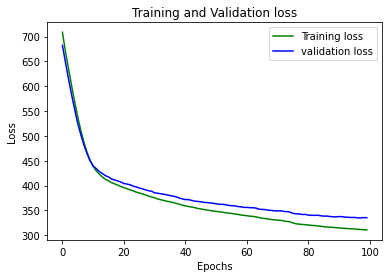

In [47]:
trainer.train(num_epochs=100, lr=0.0001)
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)

---
Extracting the updated expression matrix


In [48]:
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)
oln1=output_layer_numpy[1]

In [50]:
adata_sc=adata.copy()
oln1 = np.array(oln1, dtype=float)
adata_sc.X = oln1

In [51]:
adata_sc1=adata_sc.copy()


----

#Quality check after scScope

In [52]:
a1=adata.copy()
a2=adata_sc1.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


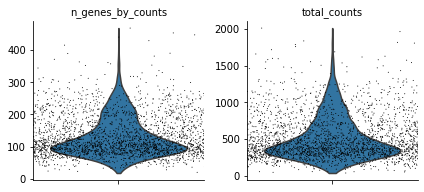

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


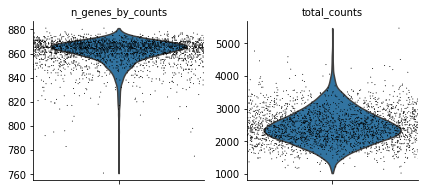

In [53]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

Visualizing cell counts and no. fo genes expressed before and after applying scScope

* Blue : before application of scScope
* Red  : after application of scScope

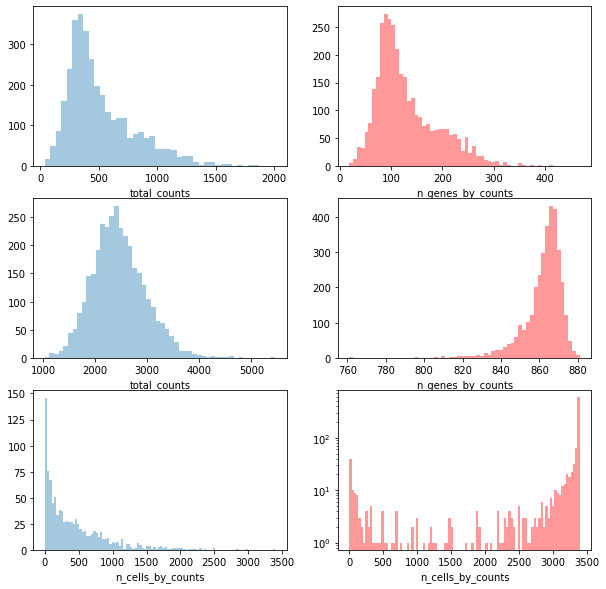

In [54]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["total_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


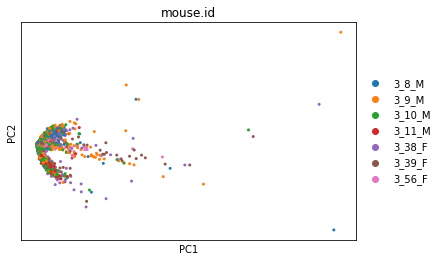

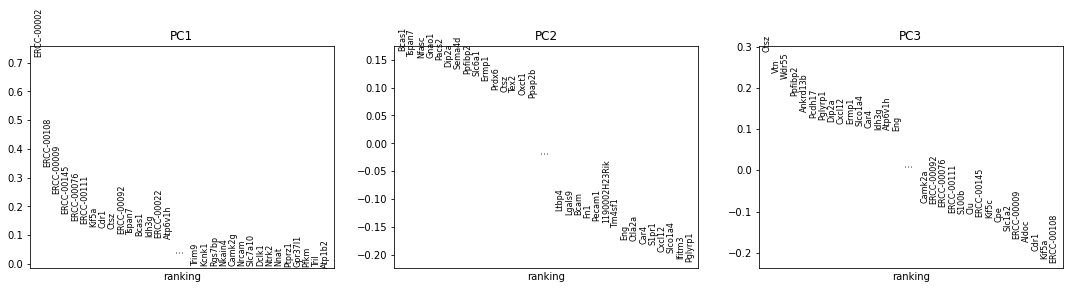

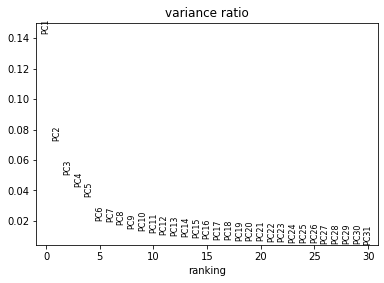

In [55]:
sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata) 
#sc.pl.pca_overview(adata) # plot pca
#sc.pl.pca_overview(adata, color='mouse.id')

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


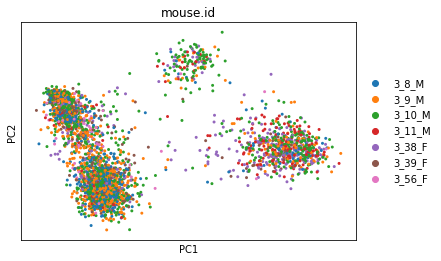

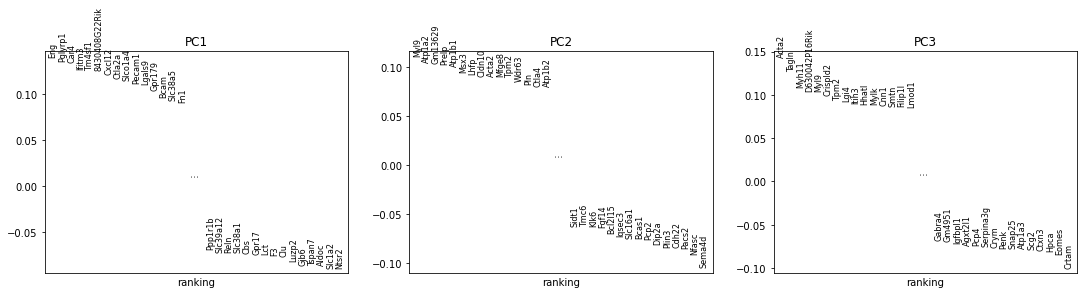

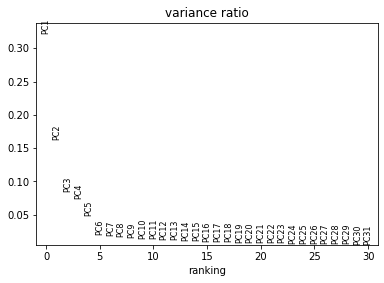

In [56]:
sc.pp.normalize_total(adata_sc1, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_sc1) 
#sc.pl.pca_overview(adata_sc1) # plot pca
#sc.pl.pca_overview(adata_sc1, color='mouse.id')

#Dimensionality reduction using UMAP

visualing the data using UMAP before and after the model

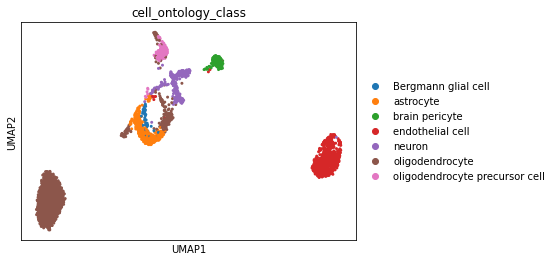

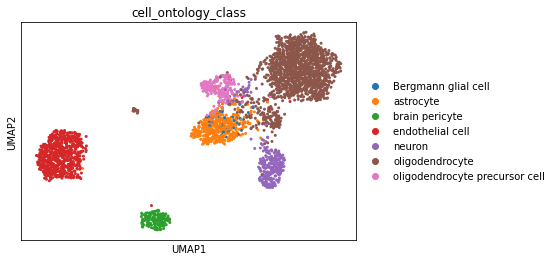

In [57]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
#sc.pl.umap(adata, color='cell_ontology_class')

sc.pp.neighbors(adata_sc1)
sc.tl.umap(adata_sc1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='cell_ontology_class')
sc.pl.umap(adata_sc1, color='cell_ontology_class')

#CLustering Analysis - using K-means

... storing 'kmeans' as categorical


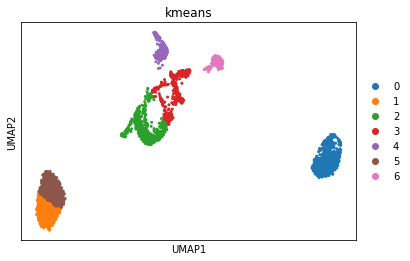

In [58]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

... storing 'kmeans' as categorical


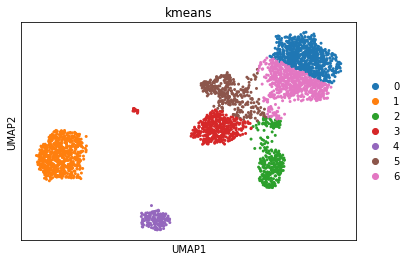

In [59]:
umap_coordinates = adata_sc1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates) 

adata_sc1.obs['kmeans'] = kmeans.labels_ 
adata_sc1.obs['kmeans'] = adata_sc1.obs['kmeans'].astype(str)

sc.pl.umap(adata_sc1, color='kmeans') 

In [60]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.57


In [61]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata_sc1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.59


#Additional visualisations using heatmaps and tracksplot

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's


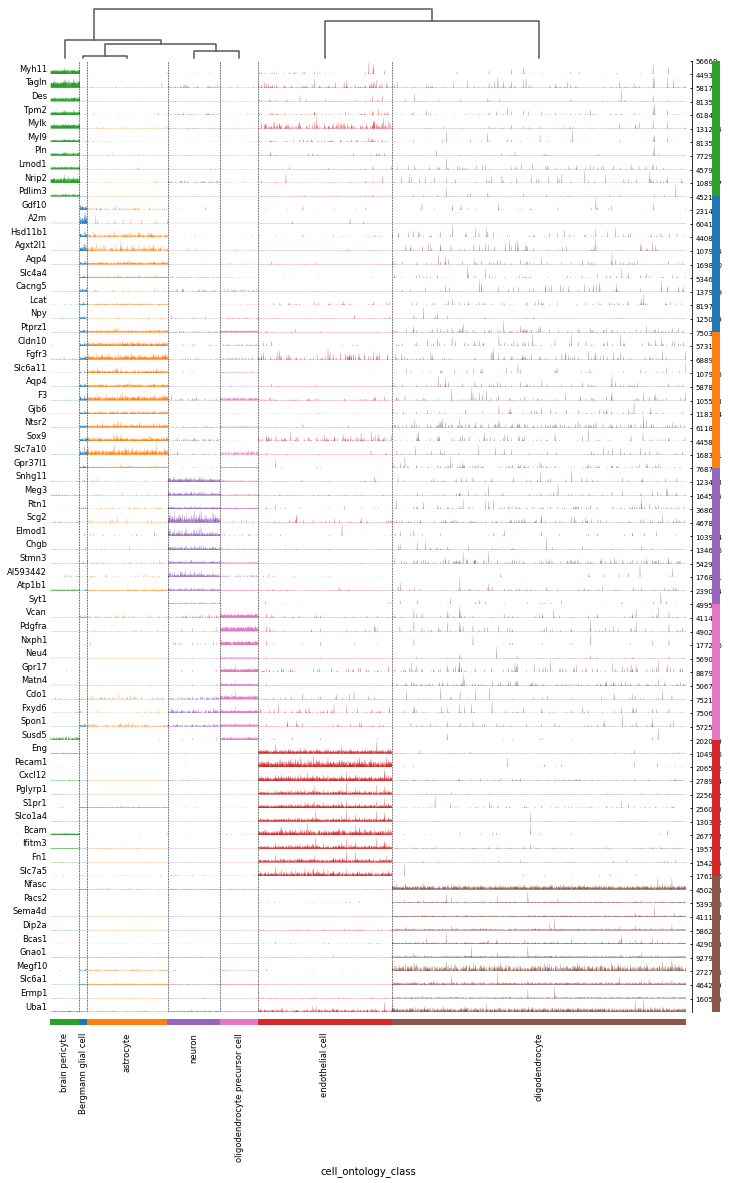

In [62]:
sc.tl.rank_genes_groups(adata, groupby='cell_ontology_class', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's


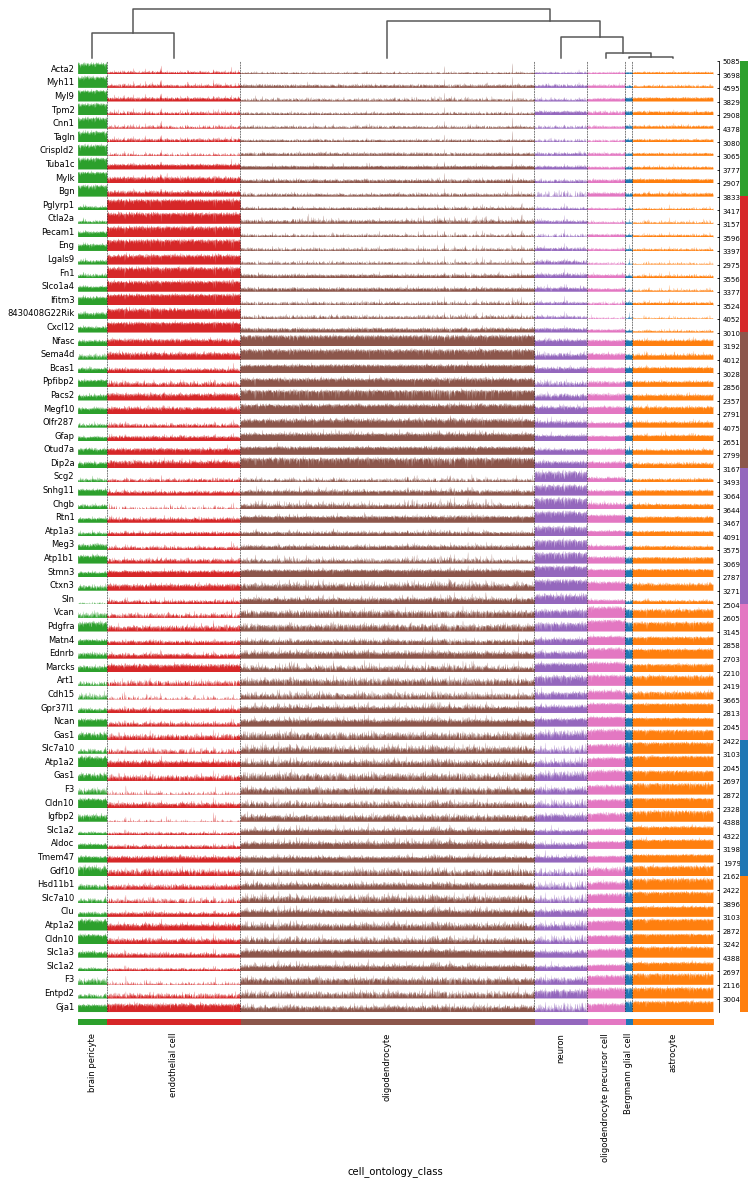

In [63]:
sc.tl.rank_genes_groups(adata_sc1, groupby='cell_ontology_class', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_sc1, groupby='cell_ontology_class') # plot the result

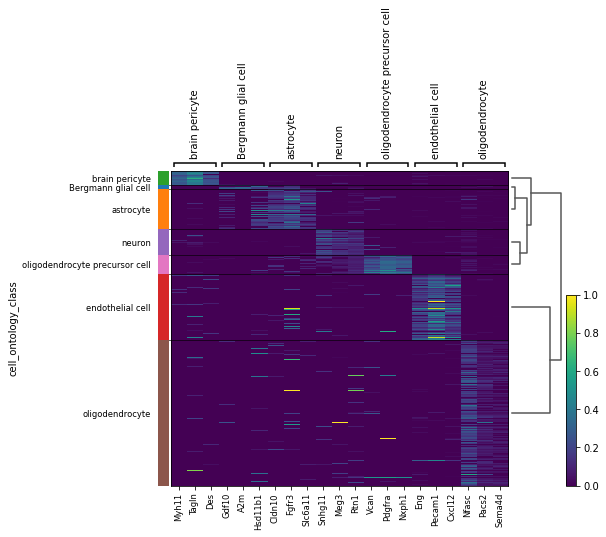

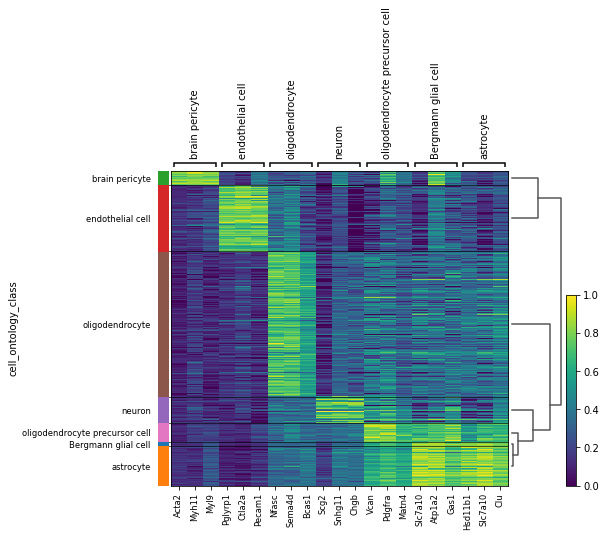

In [64]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_sc1, n_genes=3, standard_scale='var')